In [1]:
!pip install colorama

In [276]:
import yfinance as yf
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import json
from datetime import datetime,timedelta

import requests

In [315]:
response = requests.get('https://min-api.cryptocompare.com/data/histoday?fsym=ETH&tsym=CAD&limit=1000')
json.loads(response.content)['Data']
df = pd.DataFrame(json.loads(response.content)['Data'])
df.head()

time    high     low    open  volumefrom      volumeto   close  \
0  1589932800  293.12  287.95  299.78   895429.22  2.616361e+08  292.19   
1  1590019200  280.81  275.12  292.19  1145728.49  3.176789e+08  277.27   
2  1590105600  292.06  280.75  277.27   983282.11  2.859154e+08  290.78   
3  1590192000  293.40  289.15  290.78   765519.54  2.218445e+08  289.80   
4  1590278400  283.34  275.50  289.80   966301.70  2.713053e+08  280.77   

  conversionType conversionSymbol  
0       multiply              BTC  
1       multiply              BTC  
2       multiply              BTC  
3       multiply              BTC  
4       multiply              BTC

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              1001 non-null   int64  
 1   high              1001 non-null   float64
 2   low               1001 non-null   float64
 3   open              1001 non-null   float64
 4   volumefrom        1001 non-null   float64
 5   volumeto          1001 non-null   float64
 6   close             1001 non-null   float64
 7   conversionType    1001 non-null   object 
 8   conversionSymbol  1001 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 70.5+ KB


In [469]:
start_time = datetime(2018,1,1)
end_time = datetime.now()-timedelta(1)
data = yf.download('BTC-USD',start_time,end_time)
df = pd.DataFrame(data,columns=['Open','High','Low','Close'])
df.head(20)

[*********************100%***********************]  1 of 1 completed


Open          High           Low         Close
Date                                                              
2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195
2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609
2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000
2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195
2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000
2018-01-06  17462.099609  17712.400391  16764.599609  17527.000000
2018-01-07  17527.300781  17579.599609  16087.700195  16477.599609
2018-01-08  16476.199219  16537.900391  14208.200195  15170.099609
2018-01-09  15123.700195  15497.500000  14424.000000  14595.400391
2018-01-10  14588.500000  14973.299805  13691.200195  14973.299805
2018-01-11  14968.200195  15018.799805  13105.900391  13405.799805
2018-01-12  13453.900391  14229.900391  13158.099609  13980.599609
2018-01-13  13952.400391  14659.500000  13952.400391  14360.200195
2018-01-14  14370.799805  14511.799805  13268.000000  13772.000000
2018-01-15  13767.299805  14445.500000  13641.700195  13819.799805
2018-01-16  13836.099609  13843.099609  10194.900391  11490.500000
2018-01-17  11431.099609  11678.000000   9402.290039  11188.599609
2018-01-18  11198.799805  12107.299805  10942.500000  11474.900391
2018-01-19  11429.799805  11992.799805  11172.099609  11607.400391
2018-01-20  11656.200195  13103.000000  11656.200195  12899.200195

In [19]:
df.reset_index(inplace=True)
df = df.rename(columns={'index':'Date'})

In [ ]:
df.head()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              1001 non-null   int64  
 1   high              1001 non-null   float64
 2   low               1001 non-null   float64
 3   open              1001 non-null   float64
 4   volumefrom        1001 non-null   float64
 5   volumeto          1001 non-null   float64
 6   close             1001 non-null   float64
 7   conversionType    1001 non-null   object 
 8   conversionSymbol  1001 non-null   object 
dtypes: float64(6), int64(1), object(2)
memory usage: 70.5+ KB


In [7]:
df.corr()

/var/folders/n3/g8v2fwc15611w5_sqtq9z70w0000gn/T/ipykernel_679/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


time      high       low      open  volumefrom  volumeto  \
time        1.000000  0.358421  0.368049  0.364245   -0.654417 -0.248204   
high        0.358421  1.000000  0.999061  0.996878   -0.472729  0.296593   
low         0.368049  0.999061  1.000000  0.996790   -0.491598  0.264868   
open        0.364245  0.996878  0.996790  1.000000   -0.479866  0.282888   
volumefrom -0.654417 -0.472729 -0.491598 -0.479866    1.000000  0.519469   
volumeto   -0.248204  0.296593  0.264868  0.282888    0.519469  1.000000   
close       0.361655  0.999541  0.999247  0.996068   -0.479528  0.285473   

               close  
time        0.361655  
high        0.999541  
low         0.999247  
open        0.996068  
volumefrom -0.479528  
volumeto    0.285473  
close       1.000000

In [8]:
df.describe()

time         high          low         open    volumefrom  \
count  1.001000e+03  1001.000000  1001.000000  1001.000000  1.001000e+03   
mean   1.633046e+09  2448.851099  2359.708891  2405.476354  4.561392e+05   
std    2.497894e+07  1502.923976  1452.671265  1482.206831  4.345269e+05   
min    1.589846e+09   280.810000   275.120000   277.270000  2.900200e+04   
25%    1.611446e+09  1494.500000  1419.140000  1454.190000  1.589993e+05   
50%    1.633046e+09  2216.420000  2147.520000  2184.220000  2.956970e+05   
75%    1.654646e+09  3640.200000  3502.710000  3557.570000  6.168967e+05   
max    1.676246e+09  6108.350000  5942.960000  5964.740000  3.897051e+06   

           volumeto        close  
count  1.001000e+03  1001.000000  
mean   7.897585e+08  2407.127512  
std    7.014542e+08  1480.723805  
min    5.001103e+07   277.270000  
25%    3.330709e+08  1461.780000  
50%    5.732446e+08  2184.220000  
75%    9.940102e+08  3557.570000  
max    4.985122e+09  5964.740000

In [9]:
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
fig = go.Figure(data=[go.Candlestick(x=df['time'],
                open=df['open'], high=df['high'],
                low=df['low'], close=df['close'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [11]:
fig = go.Figure(data=[go.Candlestick(x=df['time'],
                open=df['open'], high=df['high'],
                low=df['low'], close=df['close'])
                      ])

fig.update_layout(
    title='The Great Recession',
    yaxis_title='AAPL Stock',
    shapes = [dict(
        x0='2018-12-09', x1='2018-12-09', y0=0, y1=1, xref='x', yref='paper',
        line_width=2)],
    annotations=[dict(
        x='2018-12-09', y=0.05, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='Increase Period Begins')]
)

fig.show()

In [279]:
from datetime import datetime
dates = [datetime(year=2019, month=10, day=10),
         datetime(year=2019, month=11, day=10),
         datetime(year=2019, month=12, day=10),
         datetime(year=2020, month=1, day=10),
         datetime(year=2020, month=2, day=10)]

fig = go.Figure(data=[go.Candlestick(x=dates,
                       open=df['open'], high=df['high'],
                low=df['low'], close=df['close'])])

fig.show()

In [13]:
sns.set()
sns.set_style('whitegrid')
df['close'].plot(figsize=(12,6),label='c')
df['close'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()

In [14]:
def triple_plot(x, title):
    fig, ax = plt.subplots(3,1,figsize=(25,10),sharex=True)
    sns.histplot(x, ax=ax[0])
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1])
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2])
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=30)
    plt.tight_layout(pad=3.0)
    plt.show()

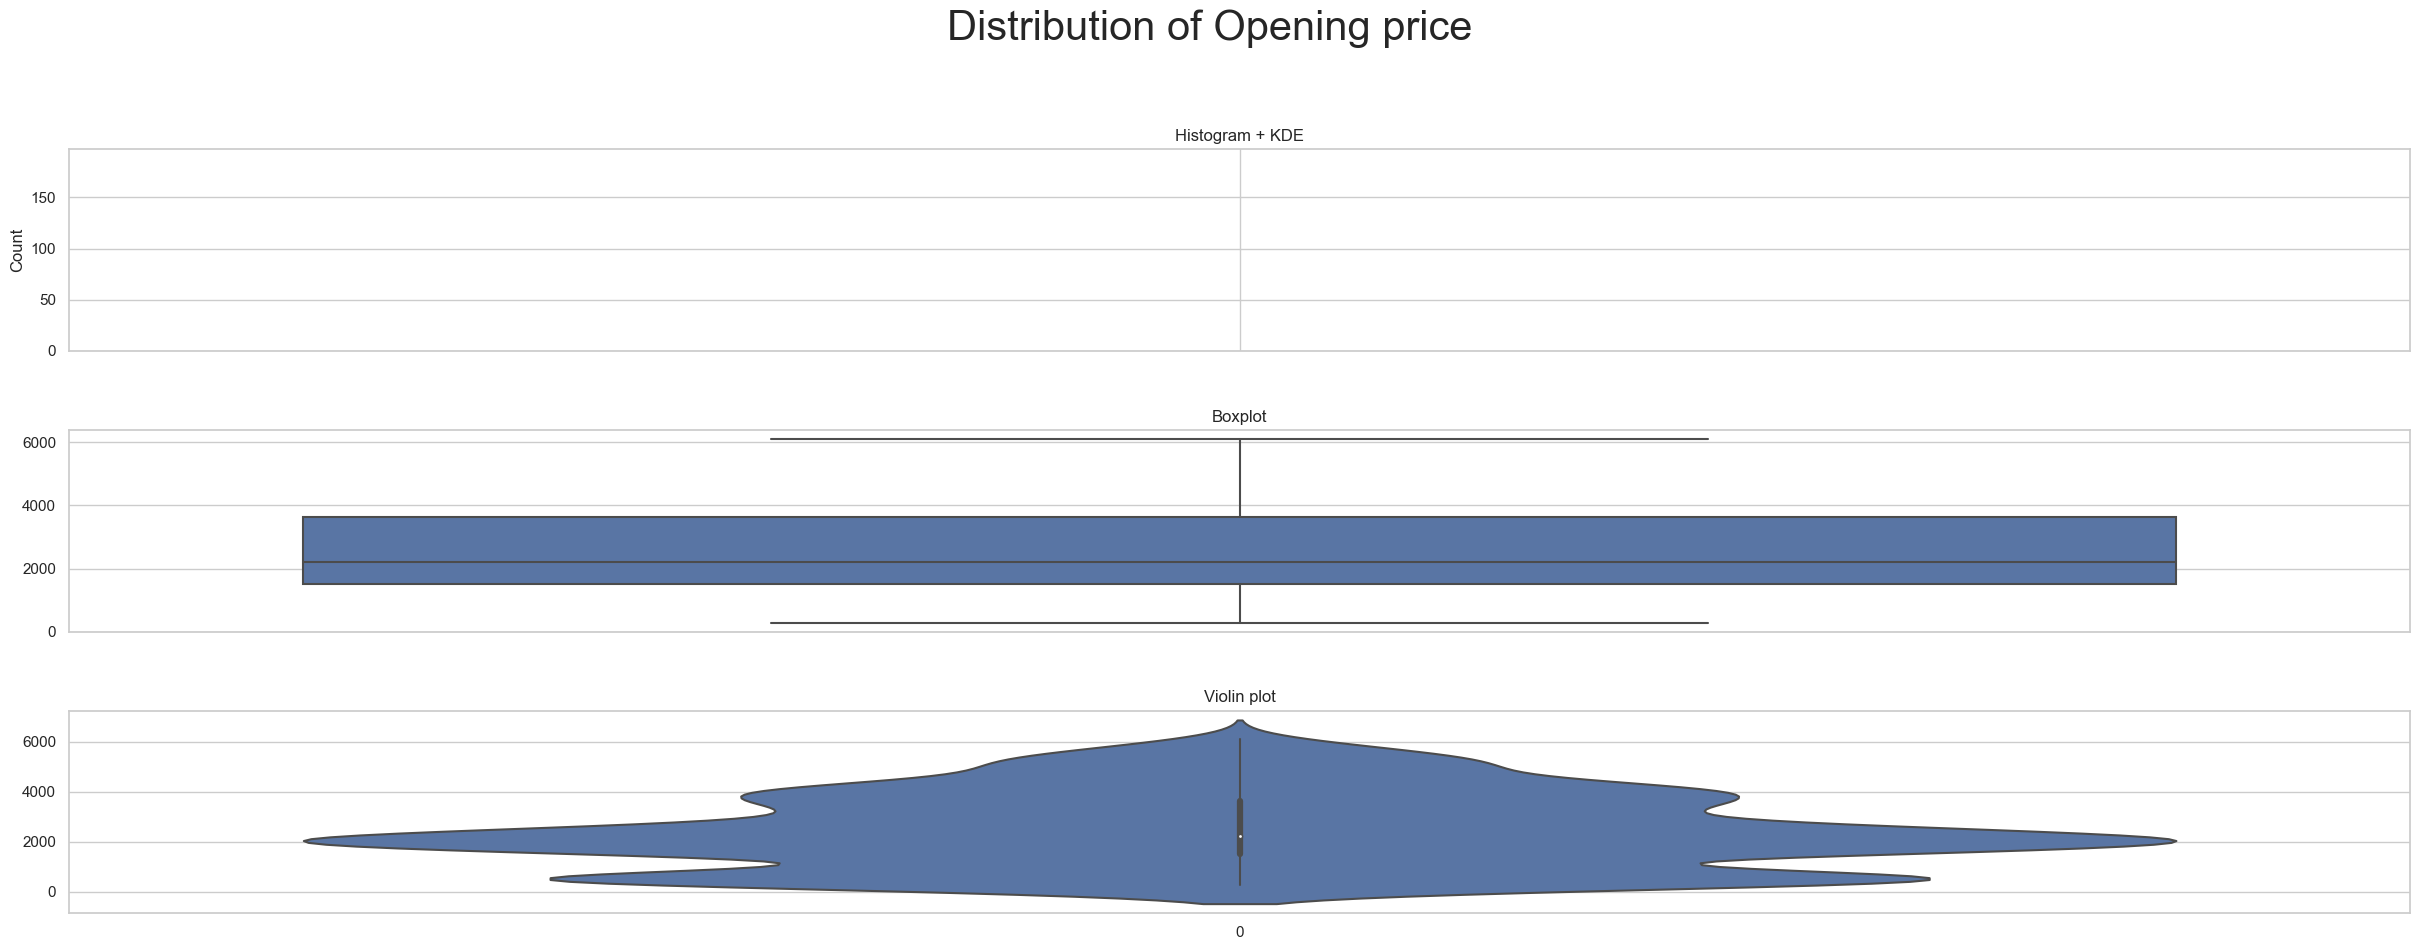

In [15]:
triple_plot(df['high'],'Distribution of Opening price')

/var/folders/n3/g8v2fwc15611w5_sqtq9z70w0000gn/T/ipykernel_679/2469951017.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

/var/folders/n3/g8v2fwc15611w5_sqtq9z70w0000gn/T/ipykernel_679/2469951017.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



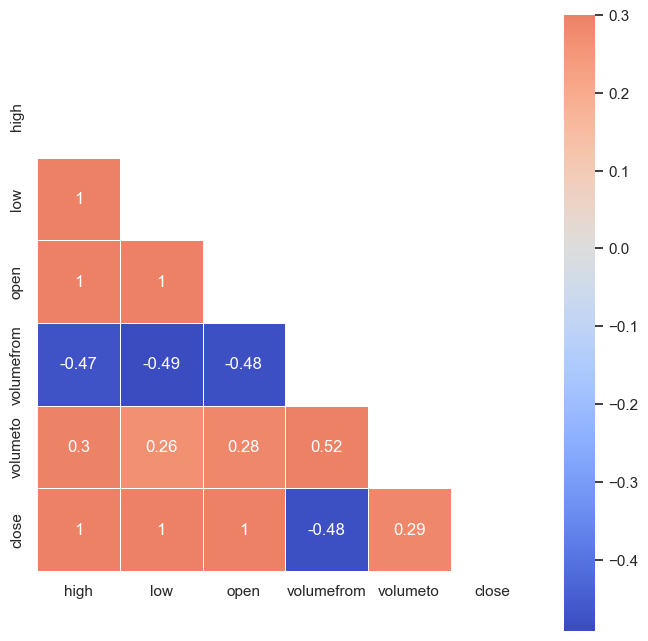

In [16]:
plt.figure(figsize=(8,8))
corr=df[df.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df[df.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

In [17]:
trace1 = {
    'x': df.index,
    'open': df.open,
    'close': df.close,
    'high': df.high,
    'low': df.low,
    'type': 'candlestick',
    'name': 'MSFT',
    'showlegend': False
}
# Calculate and define moving average of 30 periods
avg_30 = df.close.rolling(window=30, min_periods=1).mean()

# Calculate and define moving average of 50 periods
avg_50 = df.close.rolling(window=50, min_periods=1).mean()

trace2 = {
    'x': df.index,
    'y': avg_30,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'blue'
            },
    'name': 'Moving Average of 30 periods'
}

trace3 = {
    'x': df.index,
    'y': avg_50,
    'type': 'scatter',
    'mode': 'lines',
    'line': {
        'width': 1,
        'color': 'red'
    },
    'name': 'Moving Average of 50 periods'
}
data_trace = [trace1, trace2, trace3]
# Config graph layout
layout = go.Layout({
    'title': {
        'text': 'Bitcoin Moving Averages',
        'font': {
            'size': 15
        } 
    }
})




fig = go.Figure(data=data_trace, layout=layout)
fig.write_html("Bitcoin Moving Averages.html")
fig.show()

In [265]:
df['Date'] = pd.to_datetime(df['time'])

In [266]:
df.head()

time    high     low    open  volumefrom      volumeto   close  \
0  1589932800  293.12  287.95  299.78   895429.22  2.616361e+08  292.19   
1  1590019200  280.81  275.12  292.19  1145728.49  3.176789e+08  277.27   
2  1590105600  292.06  280.75  277.27   983282.11  2.859154e+08  290.78   
3  1590192000  293.40  289.15  290.78   765519.54  2.218445e+08  289.80   
4  1590278400  283.34  275.50  289.80   966301.70  2.713053e+08  280.77   

  conversionType conversionSymbol                          Date  
0       multiply              BTC 1970-01-01 00:00:01.589932800  
1       multiply              BTC 1970-01-01 00:00:01.590019200  
2       multiply              BTC 1970-01-01 00:00:01.590105600  
3       multiply              BTC 1970-01-01 00:00:01.590192000  
4       multiply              BTC 1970-01-01 00:00:01.590278400

In [20]:
df['month']=df['Date'].dt.month
layout = go.Layout({
    'title': {
        'text': 'Bitcoin Price - Monthly',
        'font': {
            'size': 15
        } 
    }
})

fig = go.Figure(data=[go.Candlestick(x=df['month'],
                open=df['open'], high=df['high'],
                low=df['low'], close=df['close'])
                      ],layout=layout)
fig.show()

In [21]:
df.head()

time    high     low    open  volumefrom      volumeto   close  \
0  1589846400  302.51  297.87  300.19   997340.42  2.989855e+08  299.78   
1  1589932800  293.12  287.95  299.78   895429.22  2.616361e+08  292.19   
2  1590019200  280.81  275.12  292.19  1145728.49  3.176789e+08  277.27   
3  1590105600  292.06  280.75  277.27   983282.11  2.859154e+08  290.78   
4  1590192000  293.40  289.15  290.78   765519.54  2.218445e+08  289.80   

  conversionType conversionSymbol                          Date  month  
0       multiply              BTC 1970-01-01 00:00:01.589846400      1  
1       multiply              BTC 1970-01-01 00:00:01.589932800      1  
2       multiply              BTC 1970-01-01 00:00:01.590019200      1  
3       multiply              BTC 1970-01-01 00:00:01.590105600      1  
4       multiply              BTC 1970-01-01 00:00:01.590192000      1

<Figure size 1500x1200 with 0 Axes>

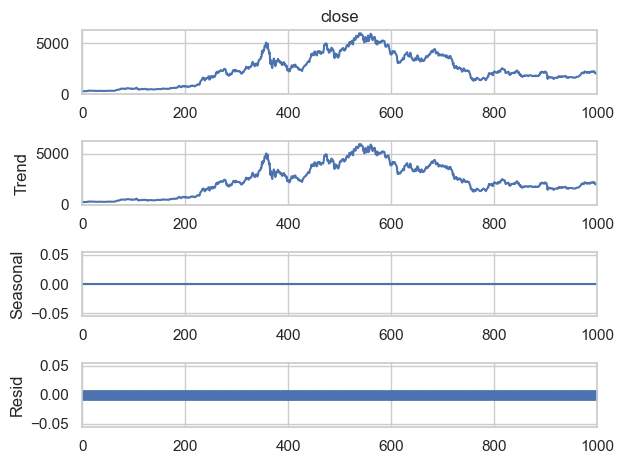

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(15,12))
series = df.close
result = seasonal_decompose(series, model='additive',period=1)
result.plot()

In [23]:
df.head()

time    high     low    open  volumefrom      volumeto   close  \
0  1589846400  302.51  297.87  300.19   997340.42  2.989855e+08  299.78   
1  1589932800  293.12  287.95  299.78   895429.22  2.616361e+08  292.19   
2  1590019200  280.81  275.12  292.19  1145728.49  3.176789e+08  277.27   
3  1590105600  292.06  280.75  277.27   983282.11  2.859154e+08  290.78   
4  1590192000  293.40  289.15  290.78   765519.54  2.218445e+08  289.80   

  conversionType conversionSymbol                          Date  month  
0       multiply              BTC 1970-01-01 00:00:01.589846400      1  
1       multiply              BTC 1970-01-01 00:00:01.589932800      1  
2       multiply              BTC 1970-01-01 00:00:01.590019200      1  
3       multiply              BTC 1970-01-01 00:00:01.590105600      1  
4       multiply              BTC 1970-01-01 00:00:01.590192000      1

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >], dtype=object)

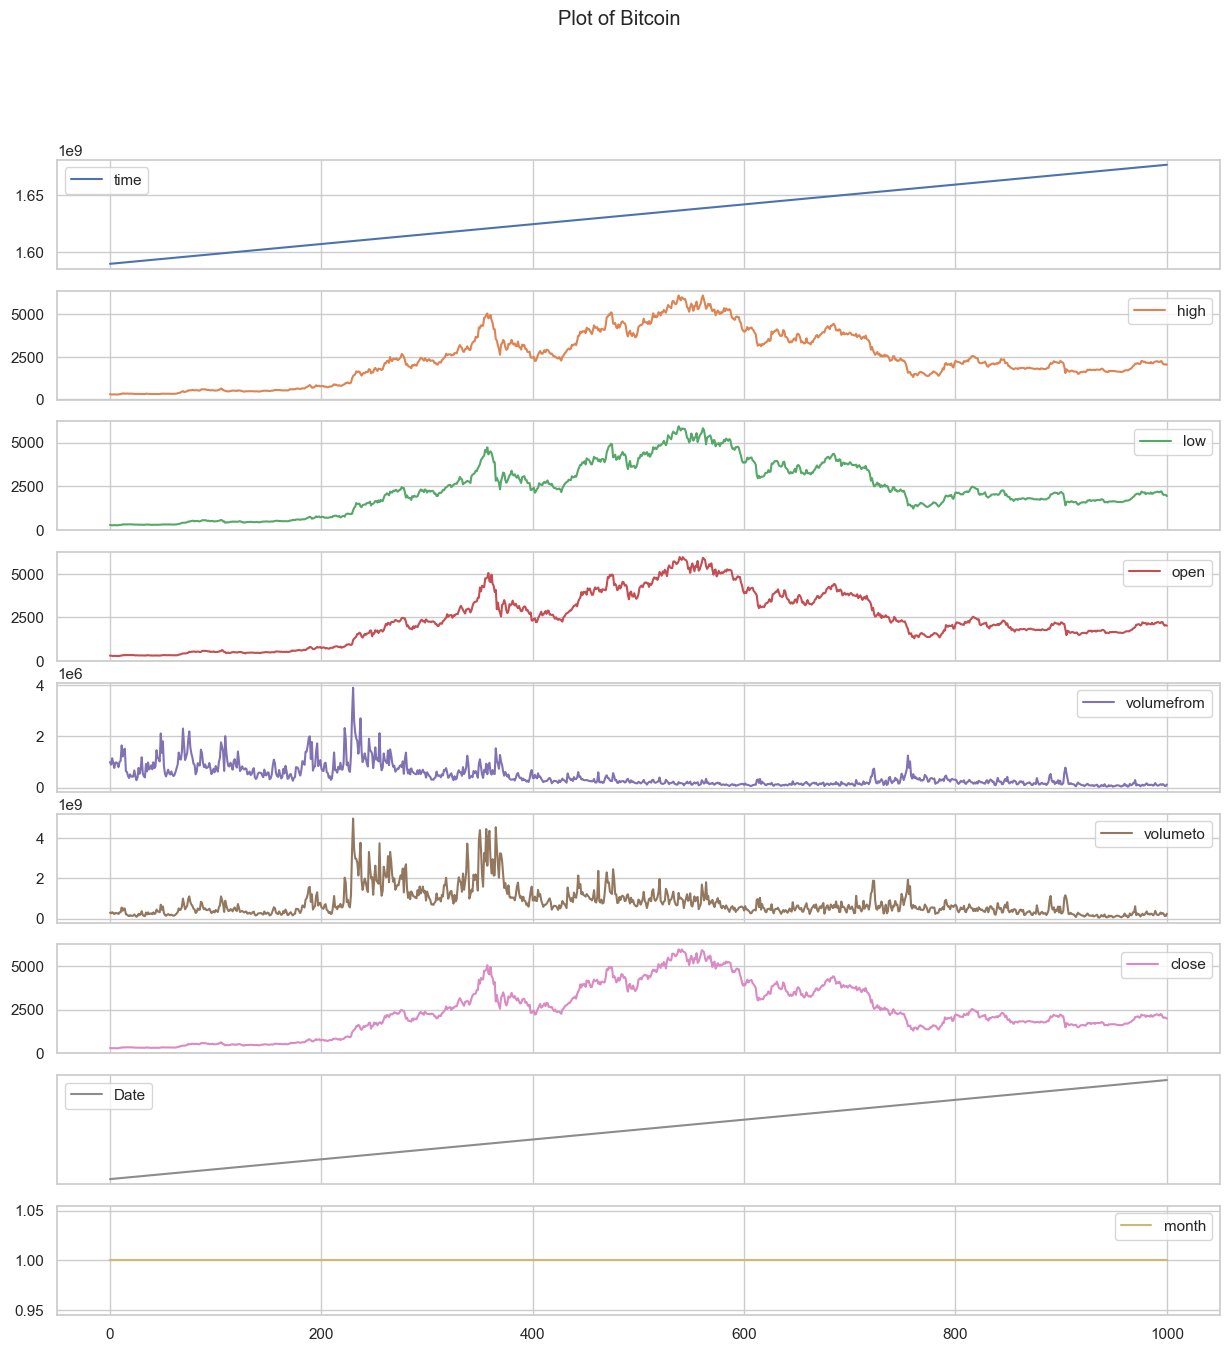

In [24]:
df.plot(figsize=(15,15),title='Plot of Bitcoin',subplots=True)

In [ ]:
df1 = df.copy()

In [ ]:
df.head()

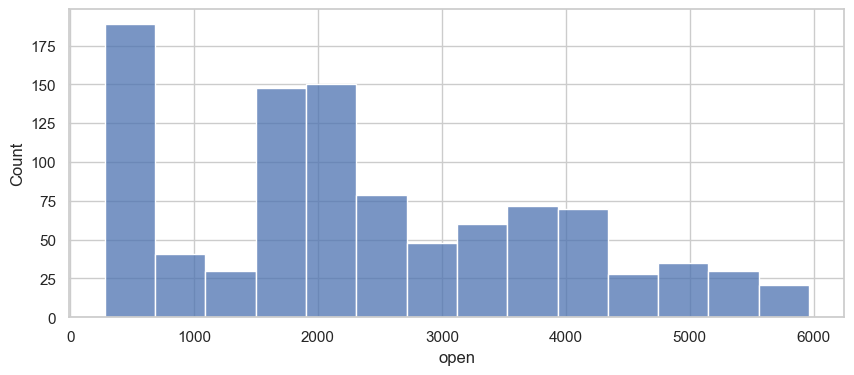

In [25]:
plt.figure(figsize=(10,4), dpi =100)
sns.histplot(df['open'])
plt.show()

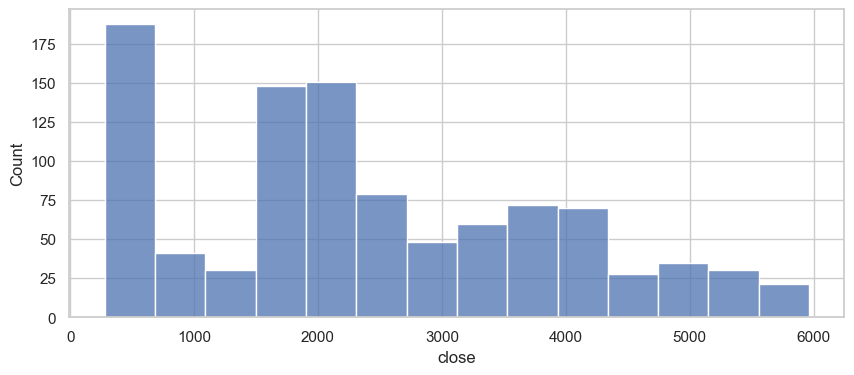

In [26]:
plt.figure(figsize=(10,4), dpi =100)
sns.histplot(df['close'])
plt.show()

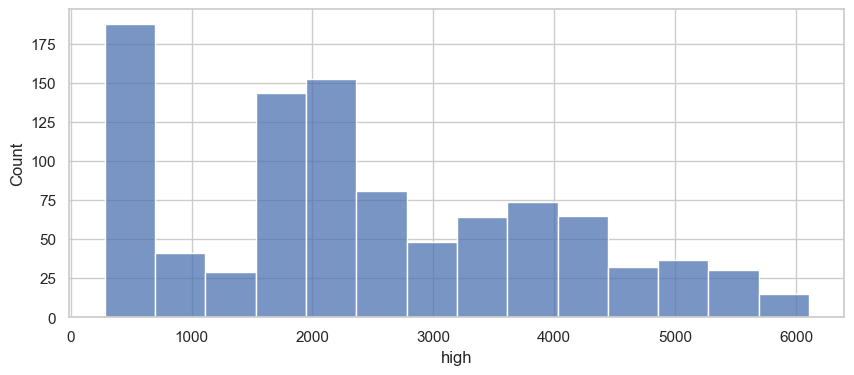

In [27]:
plt.figure(figsize=(10,4), dpi =100)
sns.histplot(df['high'])
plt.show()

<AxesSubplot: >

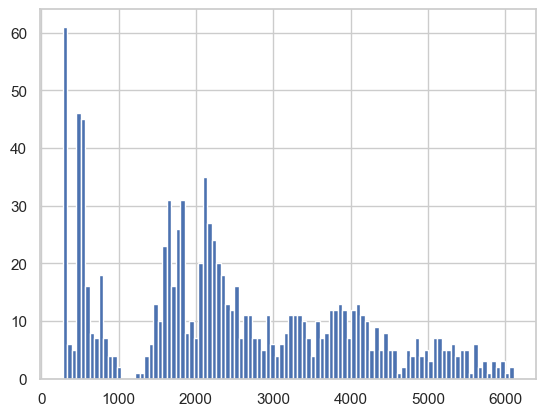

In [28]:
df['high'].hist(bins=100)

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              1001 non-null   int64         
 1   high              1001 non-null   float64       
 2   low               1001 non-null   float64       
 3   open              1001 non-null   float64       
 4   volumefrom        1001 non-null   float64       
 5   volumeto          1001 non-null   float64       
 6   close             1001 non-null   float64       
 7   conversionType    1001 non-null   object        
 8   conversionSymbol  1001 non-null   object        
 9   Date              1001 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 78.3+ KB


In [30]:
df['volumeto'].hist(bins=100)

<AxesSubplot: >

<AxesSubplot: >

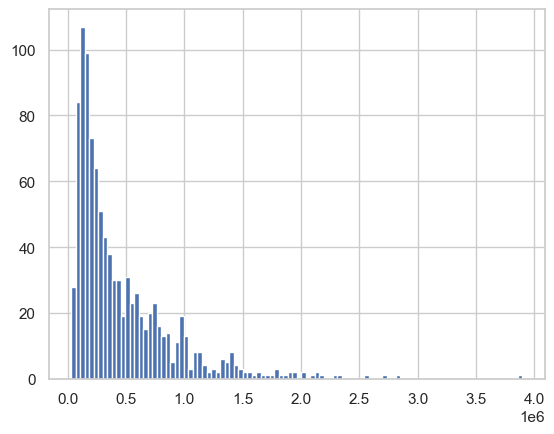

In [31]:
df['volumefrom'].hist(bins=100)

<AxesSubplot: >

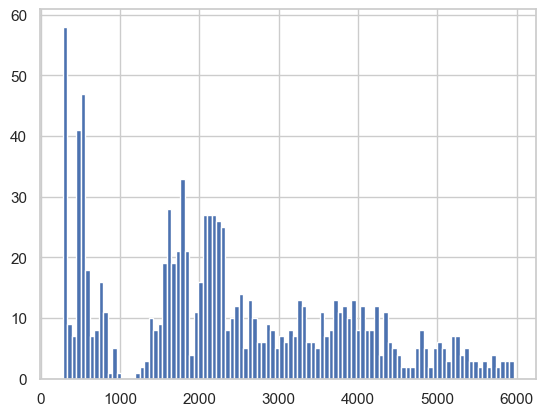

In [32]:
df['close'].hist(bins=100)

In [33]:
log_High = np.log(df['high'])
log_High.hist(bins=100)

<AxesSubplot: >

<AxesSubplot: xlabel='Date', ylabel='high'>

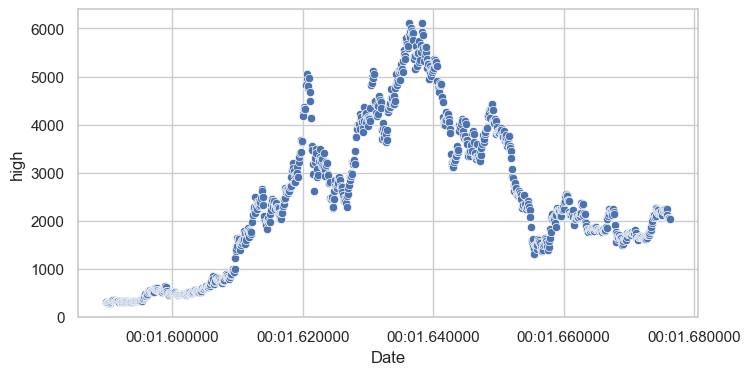

In [34]:
plt.figure(figsize=(8,4),  dpi = 100)
sns.scatterplot(data = df , y ='high',x='Date')

In [35]:
plt.figure(figsize=(8,4),  dpi = 100)
sns.scatterplot(data = df , y ='low',x='Date')

<AxesSubplot: xlabel='Date', ylabel='low'>

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              1001 non-null   int64         
 1   high              1001 non-null   float64       
 2   low               1001 non-null   float64       
 3   open              1001 non-null   float64       
 4   volumefrom        1001 non-null   float64       
 5   volumeto          1001 non-null   float64       
 6   close             1001 non-null   float64       
 7   conversionType    1001 non-null   object        
 8   conversionSymbol  1001 non-null   object        
 9   Date              1001 non-null   datetime64[ns]
 10  month             1001 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 86.1+ KB


/var/folders/n3/g8v2fwc15611w5_sqtq9z70w0000gn/T/ipykernel_679/1951345181.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<AxesSubplot: xlabel='Date'>

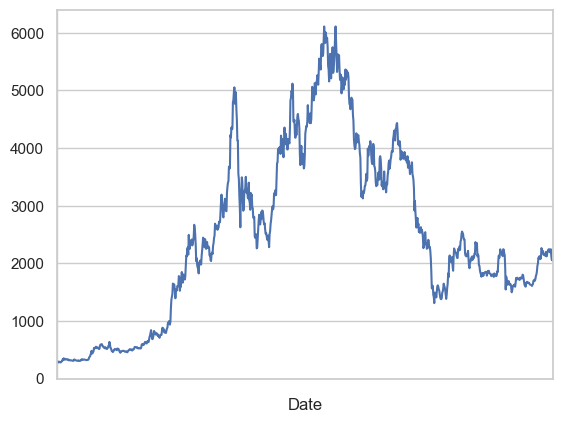

In [37]:
df.groupby('Date').mean()['high'].plot()

/var/folders/n3/g8v2fwc15611w5_sqtq9z70w0000gn/T/ipykernel_679/2003135794.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<AxesSubplot: xlabel='Date'>

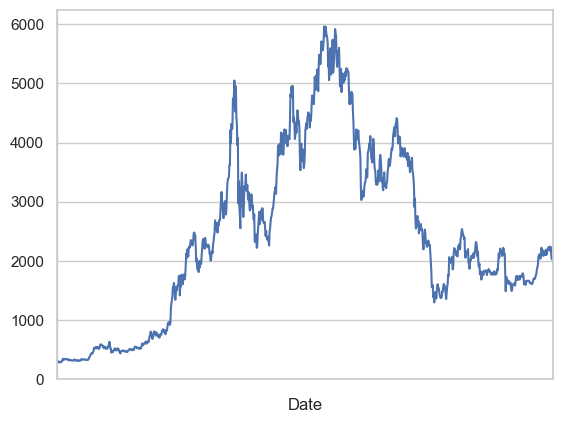

In [38]:
df.groupby('Date').mean()['close'].plot()

In [39]:
cols = list(df)[1:6]
df_traning = df[cols].astype(float)

In [40]:
df_traning = df_traning.tail(4000)
df_traning.plot.line()

<AxesSubplot: >

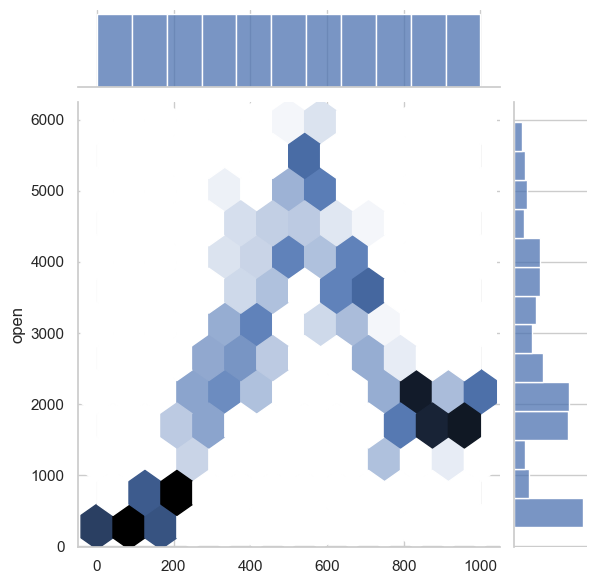

In [42]:
sns.jointplot(df['open'],kind = 'hex')

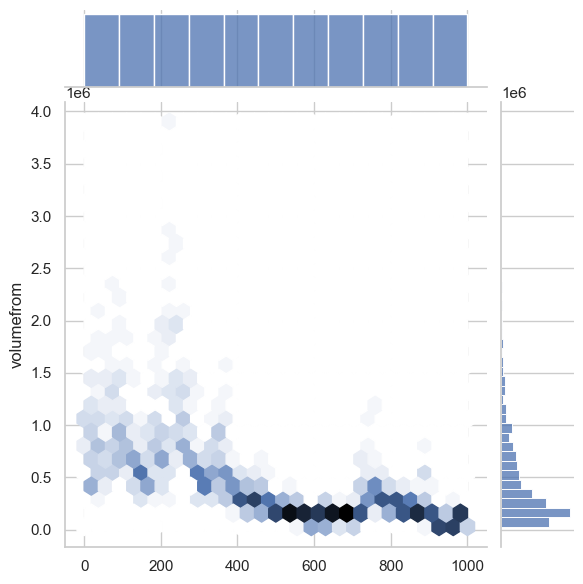

In [45]:
sns.jointplot(df['volumefrom'],kind = 'hex')

In [46]:
sns.jointplot(df['volumeto'],kind = 'hex')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              1001 non-null   int64         
 1   high              1001 non-null   float64       
 2   low               1001 non-null   float64       
 3   open              1001 non-null   float64       
 4   volumefrom        1001 non-null   float64       
 5   volumeto          1001 non-null   float64       
 6   close             1001 non-null   float64       
 7   conversionType    1001 non-null   object        
 8   conversionSymbol  1001 non-null   object        
 9   Date              1001 non-null   datetime64[ns]
 10  month             1001 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 86.1+ KB


In [47]:
sns.pairplot(df)

In [49]:
sns.stripplot(df['volumefrom'])

<AxesSubplot: ylabel='volumefrom'>

In [51]:
df

time     high      low     open  volumefrom      volumeto  \
0     1589846400   302.51   297.87   300.19   997340.42  2.989855e+08   
1     1589932800   293.12   287.95   299.78   895429.22  2.616361e+08   
2     1590019200   280.81   275.12   292.19  1145728.49  3.176789e+08   
3     1590105600   292.06   280.75   277.27   983282.11  2.859154e+08   
4     1590192000   293.40   289.15   290.78   765519.54  2.218445e+08   
...          ...      ...      ...      ...         ...           ...   
996   1675900800  2119.10  2057.52  2218.02   134088.33  2.787993e+08   
997   1675987200  2056.64  2014.70  2079.22   116880.09  2.365264e+08   
998   1676073600  2057.31  2032.82  2023.67    63326.60  1.299317e+08   
999   1676160000  2047.57  2010.04  2051.77    63094.72  1.276490e+08   
1000  1676246400  2043.38  1951.11  2023.13   120697.39  2.396701e+08   

        close conversionType conversionSymbol                          Date  \
0      299.78       multiply              BTC 1970-01-01 00:00:01.589846400   
1      292.19       multiply              BTC 1970-01-01 00:00:01.589932800   
2      277.27       multiply              BTC 1970-01-01 00:00:01.590019200   
3      290.78       multiply              BTC 1970-01-01 00:00:01.590105600   
4      289.80       multiply              BTC 1970-01-01 00:00:01.590192000   
...       ...            ...              ...                           ...   
996   2079.22       multiply              BTC 1970-01-01 00:00:01.675900800   
997   2023.67       multiply              BTC 1970-01-01 00:00:01.675987200   
998   2051.77       multiply              BTC 1970-01-01 00:00:01.676073600   
999   2023.13       multiply              BTC 1970-01-01 00:00:01.676160000   
1000  1985.71       multiply              BTC 1970-01-01 00:00:01.676246400   

      month  
0         1  
1         1  
2         1  
3         1  
4         1  
...     ...  
996       1  
997       1  
998       1  
999       1  
1000      1  

[1001 rows x 11 columns]

<AxesSubplot: xlabel='close', ylabel='open'>

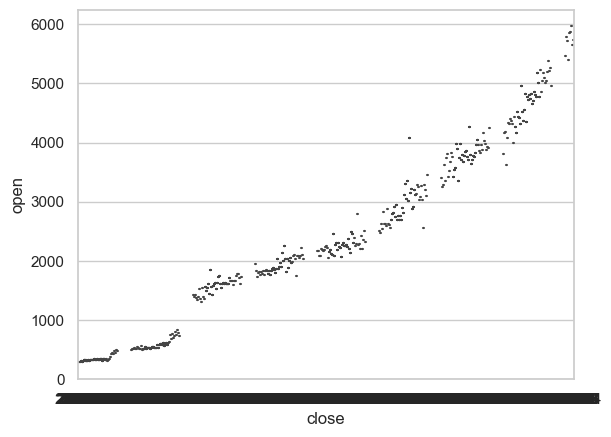

In [52]:
sns.boxplot(data=df, x=df['close'], y=df['open'])

<AxesSubplot: xlabel='volumefrom', ylabel='volumeto'>

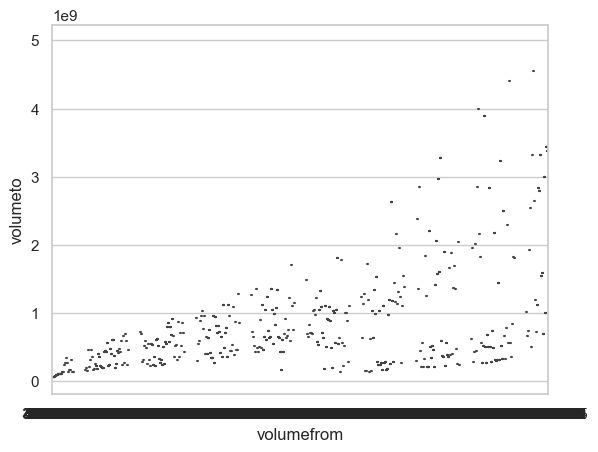

In [53]:
sns.boxplot(data=df, x=df['volumefrom'], y=df['volumeto'])

In [55]:
df['month']=df['Date'].dt.month

In [56]:
df.head()

time    high     low    open  volumefrom      volumeto   close  \
0  1589846400  302.51  297.87  300.19   997340.42  2.989855e+08  299.78   
1  1589932800  293.12  287.95  299.78   895429.22  2.616361e+08  292.19   
2  1590019200  280.81  275.12  292.19  1145728.49  3.176789e+08  277.27   
3  1590105600  292.06  280.75  277.27   983282.11  2.859154e+08  290.78   
4  1590192000  293.40  289.15  290.78   765519.54  2.218445e+08  289.80   

  conversionType conversionSymbol                          Date  month  
0       multiply              BTC 1970-01-01 00:00:01.589846400      1  
1       multiply              BTC 1970-01-01 00:00:01.589932800      1  
2       multiply              BTC 1970-01-01 00:00:01.590019200      1  
3       multiply              BTC 1970-01-01 00:00:01.590105600      1  
4       multiply              BTC 1970-01-01 00:00:01.590192000      1

In [ ]:
df.info
df1 = df[0:365]
df1.info

<AxesSubplot: xlabel='high'>

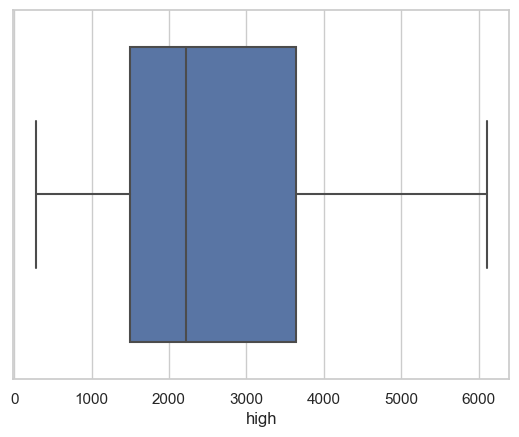

In [57]:
sns.boxplot(data=df, x="high")

<AxesSubplot: xlabel='high', ylabel='low'>

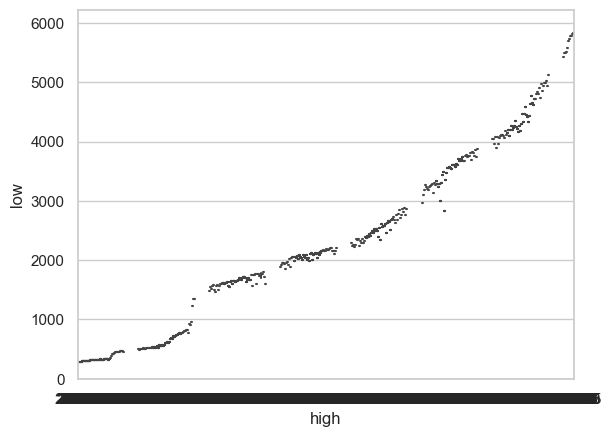

In [61]:
sns.boxplot(data=df, x="high", y="low", dodge=False)

<AxesSubplot: xlabel='high', ylabel='low'>

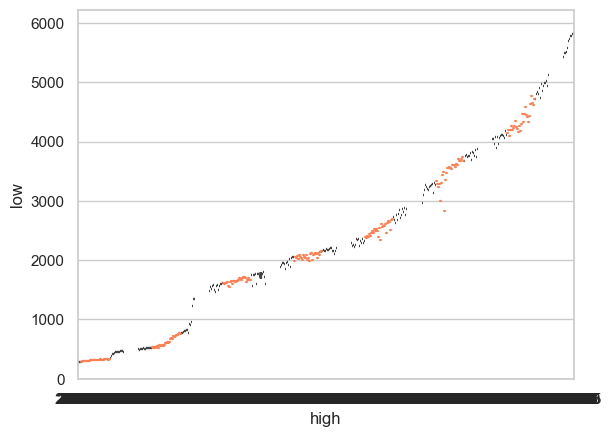

In [63]:
sns.boxplot(
    data=df, x="high", y="low",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

In [267]:
df.head()

time    high     low    open  volumefrom      volumeto   close  \
0  1589932800  293.12  287.95  299.78   895429.22  2.616361e+08  292.19   
1  1590019200  280.81  275.12  292.19  1145728.49  3.176789e+08  277.27   
2  1590105600  292.06  280.75  277.27   983282.11  2.859154e+08  290.78   
3  1590192000  293.40  289.15  290.78   765519.54  2.218445e+08  289.80   
4  1590278400  283.34  275.50  289.80   966301.70  2.713053e+08  280.77   

  conversionType conversionSymbol                          Date  
0       multiply              BTC 1970-01-01 00:00:01.589932800  
1       multiply              BTC 1970-01-01 00:00:01.590019200  
2       multiply              BTC 1970-01-01 00:00:01.590105600  
3       multiply              BTC 1970-01-01 00:00:01.590192000  
4       multiply              BTC 1970-01-01 00:00:01.590278400

In [293]:
df1['low'] =df1['low'].astype(int)
df1['open'] =df1['open'].astype(int)
df1['volumefrom'] =df1['volumefrom'].astype(int)
df1['volumeto'] =df1['volumeto'].astype(int)
df1['close'] =df1['close'].astype(int)
df1['high'] =df1['high'].astype(int)
df1['high'] =df1['high'].astype(int)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   time        1001 non-null   int64
 1   high        1001 non-null   int64
 2   low         1001 non-null   int64
 3   open        1001 non-null   int64
 4   volumefrom  1001 non-null   int64
 5   volumeto    1001 non-null   int64
 6   close       1001 non-null   int64
dtypes: int64(7)
memory usage: 54.9 KB


In [83]:
df1.drop(['conversionType', 'conversionSymbol','Date','month'], axis=1,inplace=True)

In [85]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1)
plt.show()

In [93]:
df.head()

time    high     low    open  volumefrom      volumeto   close  \
0  1589846400  302.51  297.87  300.19   997340.42  2.989855e+08  299.78   
1  1589932800  293.12  287.95  299.78   895429.22  2.616361e+08  292.19   
2  1590019200  280.81  275.12  292.19  1145728.49  3.176789e+08  277.27   
3  1590105600  292.06  280.75  277.27   983282.11  2.859154e+08  290.78   
4  1590192000  293.40  289.15  290.78   765519.54  2.218445e+08  289.80   

  conversionType conversionSymbol                          Date  month  
0       multiply              BTC 1970-01-01 00:00:01.589846400      1  
1       multiply              BTC 1970-01-01 00:00:01.589932800      1  
2       multiply              BTC 1970-01-01 00:00:01.590019200      1  
3       multiply              BTC 1970-01-01 00:00:01.590105600      1  
4       multiply              BTC 1970-01-01 00:00:01.590192000      1

In [391]:
df.drop(['level_0', 'index'], axis=1,inplace=True)

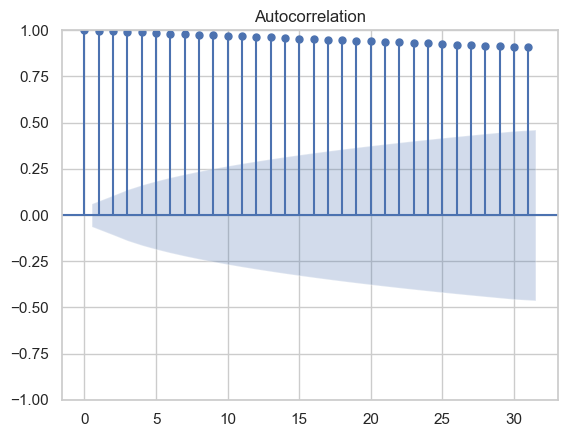

In [96]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Date'])
plt.show()

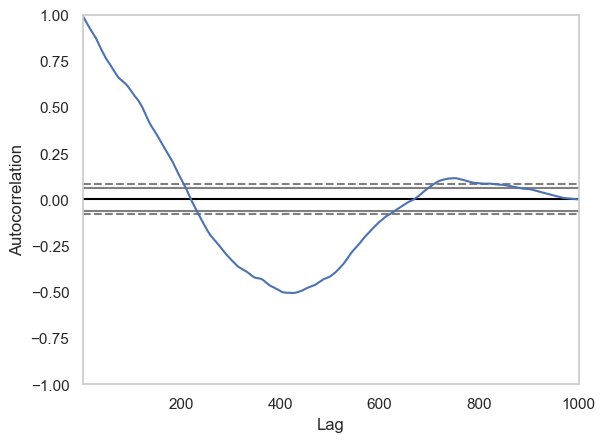

In [106]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['high'])
plt.show()

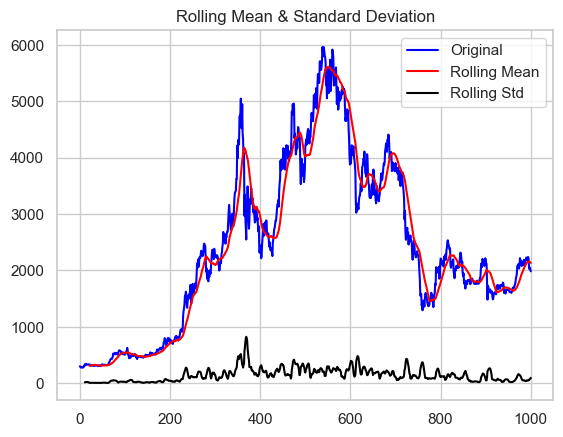

ADF Stastistic: -1.791409
p-value: 0.384735
The graph is non stationery
Critical values:
	1%: -3.437 
	5%: -2.864 
	10%: -2.568 


In [107]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = df['close']      
test_stationarity(ts)

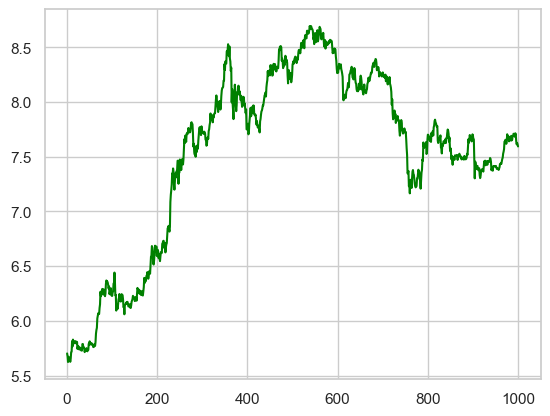

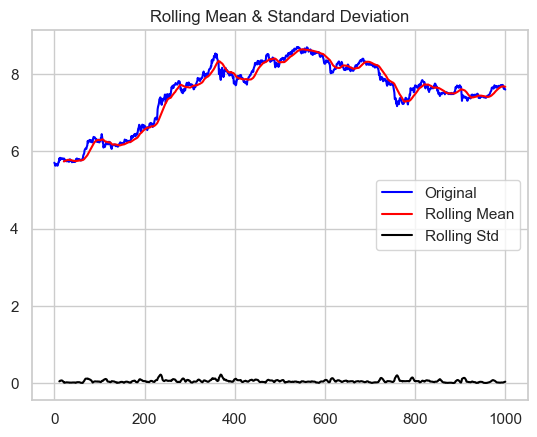

ADF Stastistic: -2.270812
p-value: 0.181554
The graph is non stationery
Critical values:
	1%: -3.437 
	5%: -2.864 
	10%: -2.568 


In [108]:
import pandas as kunfu
import numpy as dragon
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re
ts_log = dragon.log(ts)
plot.plot(ts_log,color="green")
plot.show()

test_stationarity(ts_log)

In [289]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d')

In [290]:
df.head()

time    high     low    open  volumefrom  \
0 1970-01-01 00:00:01.589932800  293.12  287.95  299.78   895429.22   
1 1970-01-01 00:00:01.590019200  280.81  275.12  292.19  1145728.49   
2 1970-01-01 00:00:01.590105600  292.06  280.75  277.27   983282.11   
3 1970-01-01 00:00:01.590192000  293.40  289.15  290.78   765519.54   
4 1970-01-01 00:00:01.590278400  283.34  275.50  289.80   966301.70   

       volumeto   close conversionType conversionSymbol  \
0  2.616361e+08  292.19       multiply              BTC   
1  3.176789e+08  277.27       multiply              BTC   
2  2.859154e+08  290.78       multiply              BTC   
3  2.218445e+08  289.80       multiply              BTC   
4  2.713053e+08  280.77       multiply              BTC   

                           Date  
0 1970-01-01 00:00:01.589932800  
1 1970-01-01 00:00:01.590019200  
2 1970-01-01 00:00:01.590105600  
3 1970-01-01 00:00:01.590192000  
4 1970-01-01 00:00:01.590278400

In [120]:
print("Latest crypto data")
latest_df = df[df['Date'] == max(df['Date'])]
print("Number of cryptocurrencies listed: ")
latest_df['conversionSymbol'].nunique()
latest_df.head()

Latest crypto data
Number of cryptocurrencies listed: 


time     high      low     open  volumefrom      volumeto  \
1000  1676246400  2043.38  1951.11  2023.13   120697.39  2.396701e+08   

        close conversionType conversionSymbol                          Date  \
1000  1985.71       multiply              BTC 1970-01-01 00:00:01.676246400   

      month  
1000      1

In [141]:
df.head()

0    True
1    True
2    True
3    True
4    True
Name: Date, dtype: bool

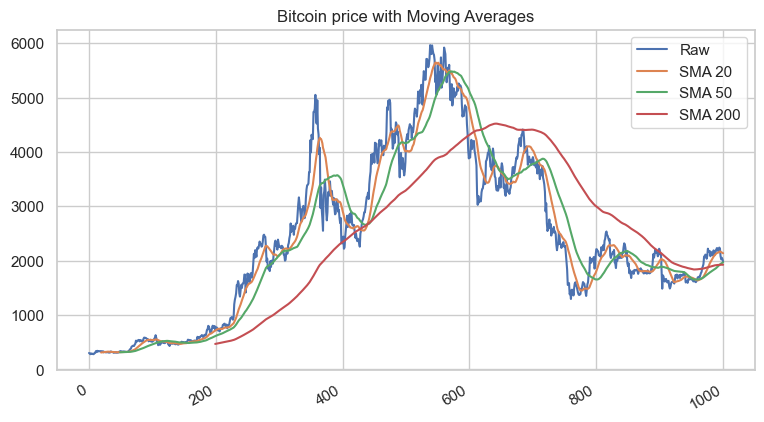

In [137]:
rank = 1
months = 10
filtered_df =  (df['Date'] > (max(df['Date']) - timedelta(days=30*months)))
sma20 = df.close.rolling(20).mean()
sma50 = df.close.rolling(50).mean()
sma200 = df.close.rolling(200).mean()
smaplot =pd.DataFrame({'Raw': df.close, 'SMA 20': sma20, 'SMA 50': sma50, 'SMA 200': sma200})
smaplot.plot(figsize=(9,5), legend=True, title="Bitcoin price with Moving Averages")
plt.gcf().autofmt_xdate()
plt.show()

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              1001 non-null   datetime64[ns]
 1   high              1001 non-null   float64       
 2   low               1001 non-null   float64       
 3   open              1001 non-null   float64       
 4   volumefrom        1001 non-null   float64       
 5   volumeto          1001 non-null   float64       
 6   close             1001 non-null   float64       
 7   conversionType    1001 non-null   object        
 8   conversionSymbol  1001 non-null   object        
 9   Date              1001 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(6), object(2)
memory usage: 78.3+ KB


In [165]:
!pip install finplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 966.1/966.1 kB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 MB 2.0 MB/s eta 0:00:0000:0100:01


In [169]:
from mplfinance.original_flavor import candlestick_ohlc

In [171]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   time        1001 non-null   int64
 1   high        1001 non-null   int64
 2   low         1001 non-null   int64
 3   open        1001 non-null   int64
 4   volumefrom  1001 non-null   int64
 5   volumeto    1001 non-null   int64
 6   close       1001 non-null   int64
dtypes: int64(7)
memory usage: 54.9 KB


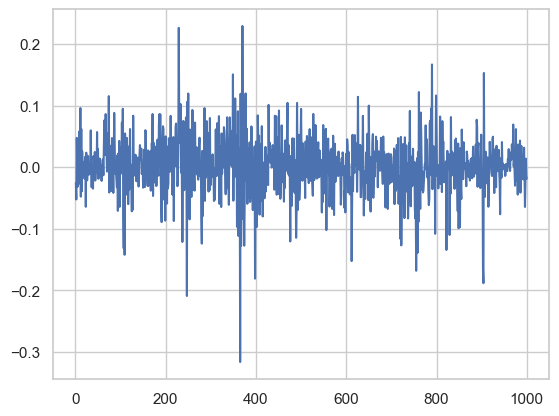

In [109]:
ts_log_diff = ts_log - ts_log.shift()
plot.plot(ts_log_diff)
plot.show()

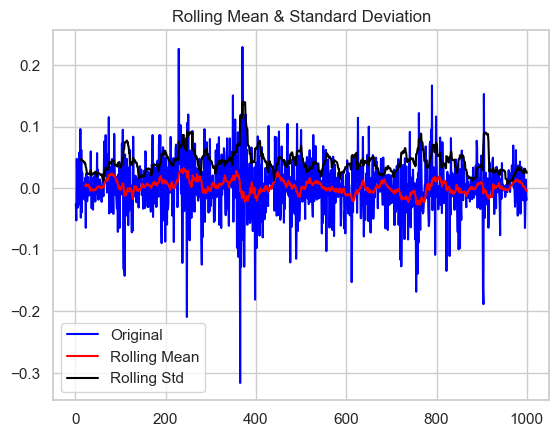

ADF Stastistic: -9.136888
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.437 
	5%: -2.864 
	10%: -2.568 


In [110]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [180]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)

import seaborn as sns
from datetime import datetime, timedelta

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from scipy import stats
import statsmodels.api as sm
from itertools import product

import warnings
warnings.filterwarnings('ignore')

In [182]:
qs = range(0, 3)
ps = range(0, 3)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(df.close, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

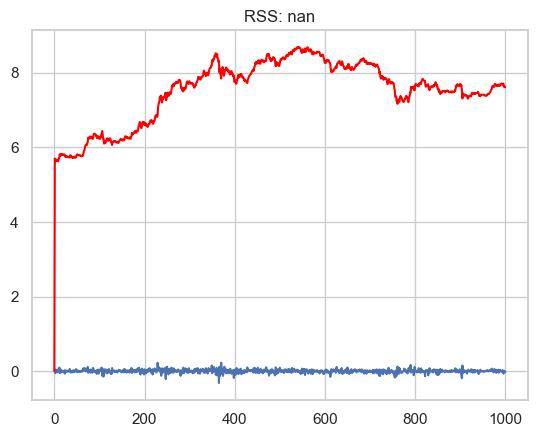

In [113]:
model = ARIMA(ts_log, order=(0,1,1))  
results_MA = model.fit()  
plot.plot(ts_log_diff)
plot.plot(results_MA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
plot.show()

In [184]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters           aic
3     (1, 0)  12592.285565
1     (0, 1)  12592.444789
2     (0, 2)  12594.118889
6     (2, 0)  12594.238907
4     (1, 1)  12594.264217


In [185]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1001
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -6294.143
Date:                Tue, 14 Feb 2023   AIC                          12592.286
Time:                        01:51:37   BIC                          12602.101
Sample:                             0   HQIC                         12596.016
                               - 1001                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0789      0.022     -3.547      0.000      -0.122      -0.035
sigma2      1.718e+04    353.948     48.533      0.000    1.65e+04    1.79e+04
Ljung-Box (L1) (Q):                   0.00   Jarque-

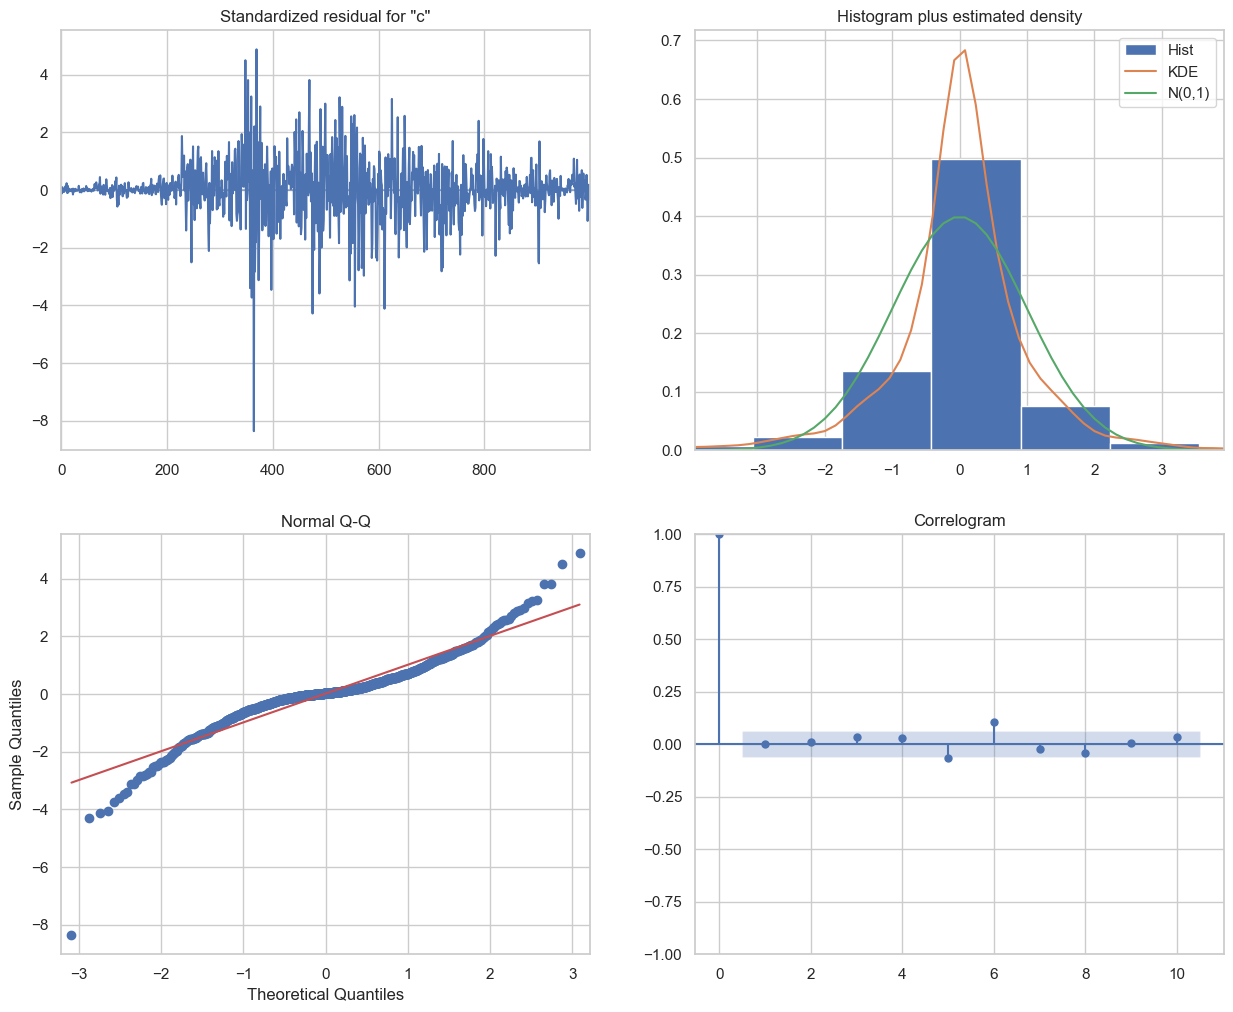

In [186]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [190]:
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(df.close, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], 4)).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [191]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters           aic
19  (1, 0, 0, 1)  12568.812406
7   (0, 1, 0, 1)  12568.957383
21  (1, 0, 1, 1)  12569.702085
9   (0, 1, 1, 1)  12569.804544
23  (1, 0, 2, 1)  12569.978293
                                      SARIMAX Results                                      
Dep. Variable:                               close   No. Observations:                 1001
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 4)   Log Likelihood               -6281.406
Date:                             Tue, 14 Feb 2023   AIC                          12568.812
Time:                                     01:57:15   BIC                          12583.524
Sample:                                          0   HQIC                         12574.405
                                            - 1001                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]

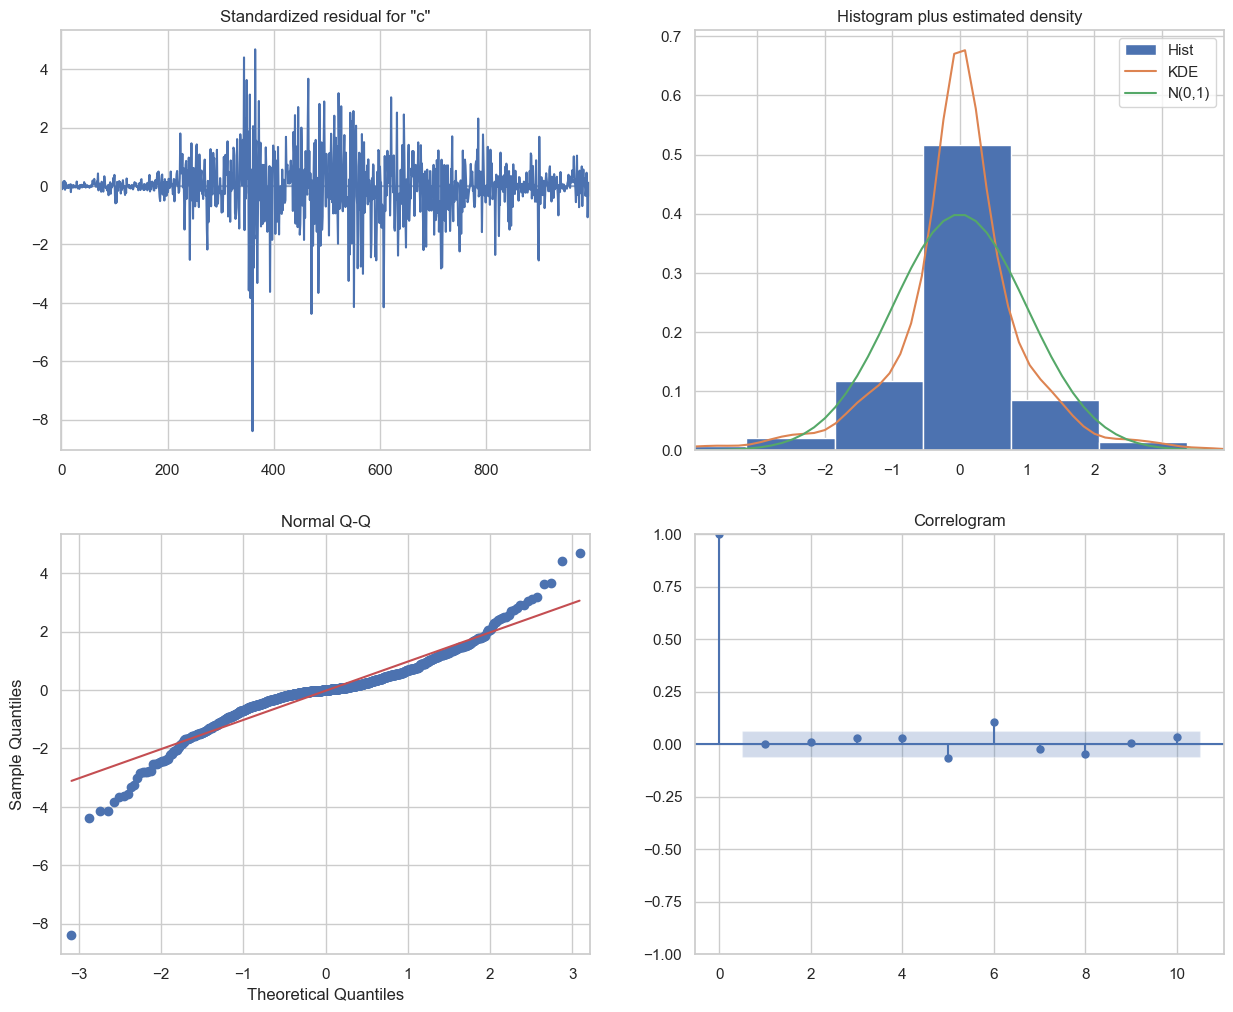

In [192]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

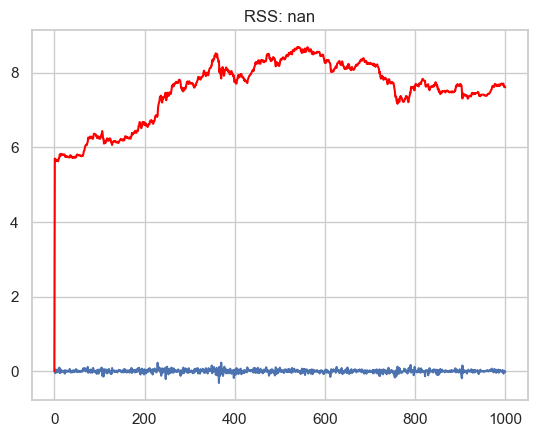

In [112]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ts_log, order=(1,1,0))  
results_ARIMA = model.fit()  
plot.plot(ts_log_diff)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plot.show()

In [ ]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric

In [ ]:
plt.figure(figsize=(15,12))
series = df.Open
result = seasonal_decompose(series, model='additive',period=1)
result.plot()

In [ ]:
df.head()

In [ ]:
prophet_df=df[['Date','Close']]
prophet_df.rename(columns={'Date':'ds','Close':'y'},inplace=True)

In [ ]:
prophet_basic = Prophet()
prophet_basic.fit(prophet_df[['ds','y']])

In [ ]:
future= prophet_basic.make_future_dataframe(periods=365)#Making predictions for one year
future.tail(2)

In [ ]:
forecast=prophet_basic.predict(future)
fig1 =prophet_basic.plot(forecast)

In [ ]:
fig1 = prophet_basic.plot_components(forecast)

In [ ]:
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

In [ ]:
from colorama import Fore, Back, Style # For text colors
y_= Fore.CYAN
m_= Fore.WHITE
print(f'{m_}Change points:\n {y_}{prophet_basic.changepoints}\n')

In [ ]:
df

In [ ]:
prophet_df['Open'] = df['Open']
prophet_df['High'] = df['High']
prophet_df['Low'] = df['Low']
prophet_df['Close'] = df['Close']

In [ ]:
pro_regressor= Prophet()
pro_regressor.add_regressor('Open')
pro_regressor.add_regressor('High')
pro_regressor.add_regressor('Low')
pro_regressor.add_regressor('Close')

In [ ]:
train_X= prophet_df[:1000]
test_X= prophet_df[1000:]

In [ ]:
pro_regressor.fit(train_X)
future_data = pro_regressor.make_future_dataframe(periods=200)
forecast_data = pro_regressor.predict(test_X)
pro_regressor.plot(forecast_data);

In [ ]:
df_cv = cross_validation(pro_regressor, initial='100 days', period='180 days', horizon = '365 days')
pm = performance_metrics(df_cv, rolling_window=0.1)
display(pm.head(),pm.tail())
fig = plot_cross_validation_metric(df_cv, metric='mape', rolling_window=0.1)
plt.show()

In [193]:
df.head()

time    high     low    open  volumefrom      volumeto   close  \
0  1589846400  302.51  297.87  300.19   997340.42  2.989855e+08  299.78   
1  1589932800  293.12  287.95  299.78   895429.22  2.616361e+08  292.19   
2  1590019200  280.81  275.12  292.19  1145728.49  3.176789e+08  277.27   
3  1590105600  292.06  280.75  277.27   983282.11  2.859154e+08  290.78   
4  1590192000  293.40  289.15  290.78   765519.54  2.218445e+08  289.80   

  conversionType conversionSymbol                          Date  
0       multiply              BTC 1970-01-01 00:00:01.589846400  
1       multiply              BTC 1970-01-01 00:00:01.589932800  
2       multiply              BTC 1970-01-01 00:00:01.590019200  
3       multiply              BTC 1970-01-01 00:00:01.590105600  
4       multiply              BTC 1970-01-01 00:00:01.590192000

In [294]:
df['time'] = pd.to_datetime(df['time'], unit='s')

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   time              1001 non-null   int64         
 1   high              1001 non-null   float64       
 2   low               1001 non-null   float64       
 3   open              1001 non-null   float64       
 4   volumefrom        1001 non-null   float64       
 5   volumeto          1001 non-null   float64       
 6   close             1001 non-null   float64       
 7   conversionType    1001 non-null   object        
 8   conversionSymbol  1001 non-null   object        
 9   Date              1001 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 78.3+ KB


<AxesSubplot: xlabel='time'>

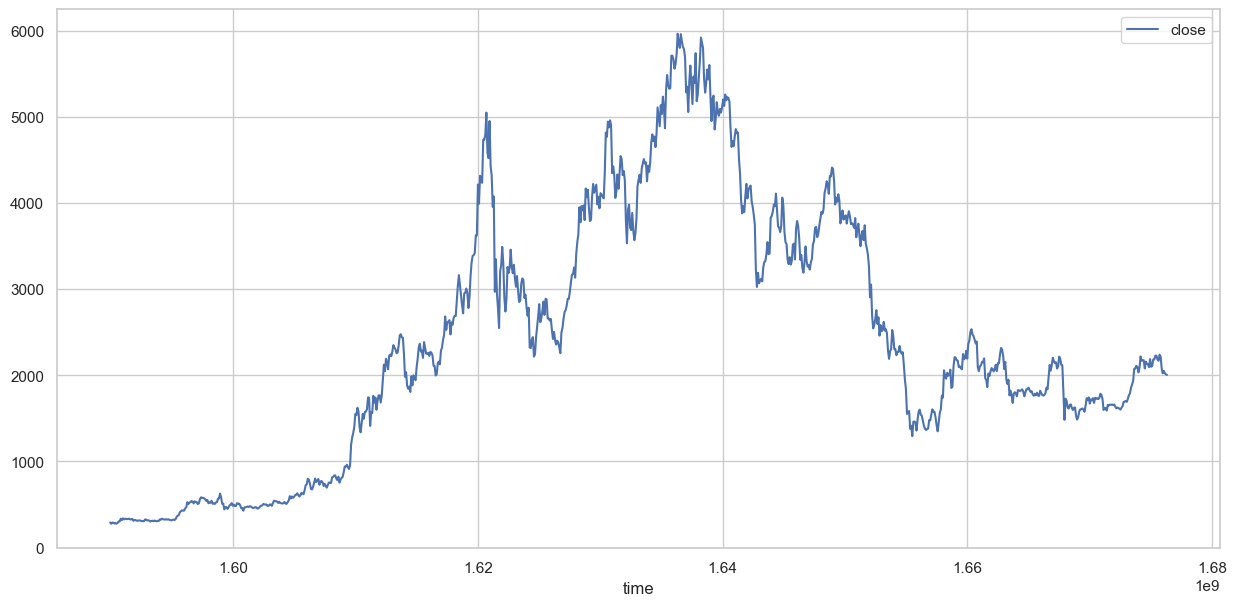

In [271]:
df.plot(x="time",y="close")

In [272]:
missing_values = df.isnull().sum()
missing_per = (missing_values/df.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

Total Missing Values  Missing %
time                                 0        0.0
high                                 0        0.0
low                                  0        0.0
open                                 0        0.0
volumefrom                           0        0.0
volumeto                             0        0.0
close                                0        0.0
conversionType                       0        0.0
conversionSymbol                     0        0.0
Date                                 0        0.0

In [296]:
df2 = df.copy()
df2 = df2.set_index('Date')

df2.head()

time    high     low  \
Date                                                                          
1970-01-01 00:00:01.589932800 1970-01-01 00:00:01.589932800  293.12  287.95   
1970-01-01 00:00:01.590019200 1970-01-01 00:00:01.590019200  280.81  275.12   
1970-01-01 00:00:01.590105600 1970-01-01 00:00:01.590105600  292.06  280.75   
1970-01-01 00:00:01.590192000 1970-01-01 00:00:01.590192000  293.40  289.15   
1970-01-01 00:00:01.590278400 1970-01-01 00:00:01.590278400  283.34  275.50   

                                 open  volumefrom      volumeto   close  \
Date                                                                      
1970-01-01 00:00:01.589932800  299.78   895429.22  2.616361e+08  292.19   
1970-01-01 00:00:01.590019200  292.19  1145728.49  3.176789e+08  277.27   
1970-01-01 00:00:01.590105600  277.27   983282.11  2.859154e+08  290.78   
1970-01-01 00:00:01.590192000  290.78   765519.54  2.218445e+08  289.80   
1970-01-01 00:00:01.590278400  289.80   966301.70  2.713053e+08  280.77   

                              conversionType conversionSymbol  
Date                                                           
1970-01-01 00:00:01.589932800       multiply              BTC  
1970-01-01 00:00:01.590019200       multiply              BTC  
1970-01-01 00:00:01.590105600       multiply              BTC  
1970-01-01 00:00:01.590192000       multiply              BTC  
1970-01-01 00:00:01.590278400       multiply              BTC

In [297]:
hourly_data = df2.resample('1H').mean()
hourly_data = hourly_data.reset_index()
hourly_data.head()

Date         high          low         open     volumefrom  \
0 1970-01-01  2450.550819  2361.441678  2407.186094  455181.244855   

       volumeto        close  
0  7.895400e+08  2408.856004

In [298]:
bitstamp_daily = df2.resample("24H").mean() 
bitstamp_daily.head()

high          low         open     volumefrom  \
Date                                                               
1970-01-01  2450.550819  2361.441678  2407.186094  455181.244855   

                volumeto        close  
Date                                   
1970-01-01  7.895400e+08  2408.856004

In [299]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [302]:
bitstamp_daily.reset_index(inplace=True)

trace1 = go.Scatter(
        x = bitstamp_daily['Date'],
    y = bitstamp_daily['open'].astype(float),
    mode = 'lines',
    name = 'Open'
)

trace2 = go.Scatter(
    x = bitstamp_daily['Date'],
    y = bitstamp_daily['close'].astype(float),
    mode = 'lines',
    name = 'Close'
)
trace3 = go.Scatter(
    x = bitstamp_daily['Date'],
    y = bitstamp_daily['volumeto'].astype(float),
    mode = 'lines',
    name = 'volumeto Avg'
)

layout = dict(
    title='Historical Bitcoin Prices with the Slider ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(count=60,
                     label='5y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1,trace2,trace3]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [209]:
trace1 = go.Scatter(
    x = bitstamp_daily['time'],
    y = bitstamp_daily['volumefrom'].astype(float),
    mode = 'lines',
    name = 'Currency',
    marker = dict(
            color='#FFBB33')
)

layout = dict(
    title='Currency(USD) Volume traded in Bitcoin with the slider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(count=60,
                     label='5y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

In [210]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

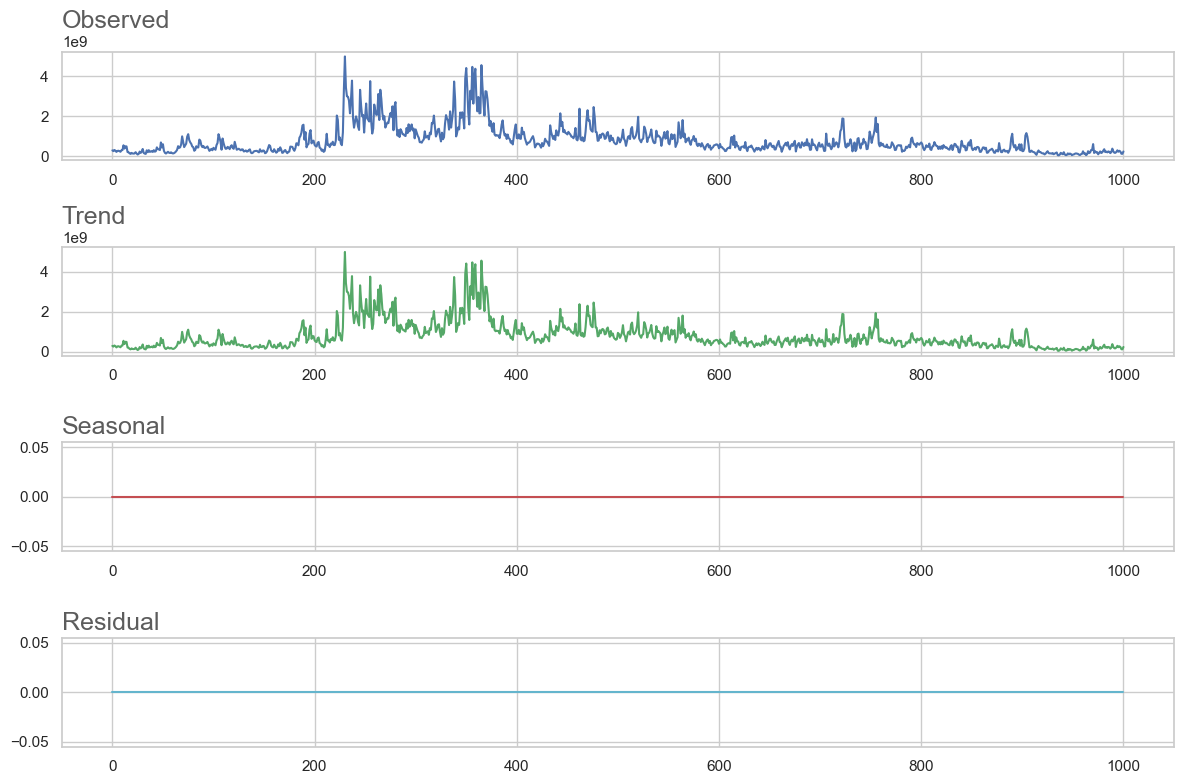

In [213]:
decomposition = sm.tsa.seasonal_decompose(bitstamp_daily.volumeto,period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

ax, fig = plt.subplots(figsize=(12,8), sharex=True)

plt.subplot(411)
plt.plot(bitstamp_daily.volumeto, label='Original',color='b')
plt.title("Observed",loc="left", alpha=0.75, fontsize=18)

plt.subplot(412)
plt.plot(trend, label='Trend',color='g')
plt.title("Trend",loc="left", alpha=0.75, fontsize=18)

plt.subplot(413)
plt.plot(seasonal,label='Seasonality',color='r')
plt.title("Seasonal",loc="left", alpha=0.75, fontsize=18)

plt.subplot(414)
plt.plot(residual, label='Residuals',color='c')
plt.title("Residual",loc="left", alpha=0.75, fontsize=18)
plt.tight_layout()


In [218]:
print("Dicky-Fuller stationarity test: p=%f" % sm.tsa.adfuller(bitstamp_daily["high"])[1])

Dicky-Fuller stationarity test: p=0.401729


In [317]:
df['time'] = pd.to_datetime(df.time)
df["month"] = df.time.dt.month
df["week"] = df.time.dt.week
df["day"] = df.time.dt.day
df["day_of_week"] = df.time.dt.dayofweek
df.head()

time    high     low    open  volumefrom  \
0 1970-01-01 00:00:01.589932800  293.12  287.95  299.78   895429.22   
1 1970-01-01 00:00:01.590019200  280.81  275.12  292.19  1145728.49   
2 1970-01-01 00:00:01.590105600  292.06  280.75  277.27   983282.11   
3 1970-01-01 00:00:01.590192000  293.40  289.15  290.78   765519.54   
4 1970-01-01 00:00:01.590278400  283.34  275.50  289.80   966301.70   

       volumeto   close conversionType conversionSymbol  month  week  day  \
0  2.616361e+08  292.19       multiply              BTC      1     1    1   
1  3.176789e+08  277.27       multiply              BTC      1     1    1   
2  2.859154e+08  290.78       multiply              BTC      1     1    1   
3  2.218445e+08  289.80       multiply              BTC      1     1    1   
4  2.713053e+08  280.77       multiply              BTC      1     1    1   

   day_of_week  
0            3  
1            3  
2            3  
3            3  
4            3

# Feature Engineering

In [318]:
df['short_mavg'] = df['close'].rolling(window=10, min_periods=1, center=False).mean()
df['long_mavg'] = df['close'].rolling(window=60, min_periods=1, center=False).mean()
df['signal'] = np.where(df['short_mavg'] > df['long_mavg'], 1.0, 0.0)

In [319]:
df.head()

time    high     low    open  volumefrom  \
0 1970-01-01 00:00:01.589932800  293.12  287.95  299.78   895429.22   
1 1970-01-01 00:00:01.590019200  280.81  275.12  292.19  1145728.49   
2 1970-01-01 00:00:01.590105600  292.06  280.75  277.27   983282.11   
3 1970-01-01 00:00:01.590192000  293.40  289.15  290.78   765519.54   
4 1970-01-01 00:00:01.590278400  283.34  275.50  289.80   966301.70   

       volumeto   close conversionType conversionSymbol  month  week  day  \
0  2.616361e+08  292.19       multiply              BTC      1     1    1   
1  3.176789e+08  277.27       multiply              BTC      1     1    1   
2  2.859154e+08  290.78       multiply              BTC      1     1    1   
3  2.218445e+08  289.80       multiply              BTC      1     1    1   
4  2.713053e+08  280.77       multiply              BTC      1     1    1   

   day_of_week  short_mavg   long_mavg  signal  
0            3  292.190000  292.190000     0.0  
1            3  284.730000  284.730000     0.0  
2            3  286.746667  286.746667     0.0  
3            3  287.510000  287.510000     0.0  
4            3  286.162000  286.162000     0.0

In [320]:
def EMA(df, n):
    EMA = pd.Series(df['close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA
df['EMA10'] = EMA(df, 10)
df['EMA30'] = EMA(df, 30)
df['EMA200'] = EMA(df, 200)
df.head()

time    high     low    open  volumefrom  \
0 1970-01-01 00:00:01.589932800  293.12  287.95  299.78   895429.22   
1 1970-01-01 00:00:01.590019200  280.81  275.12  292.19  1145728.49   
2 1970-01-01 00:00:01.590105600  292.06  280.75  277.27   983282.11   
3 1970-01-01 00:00:01.590192000  293.40  289.15  290.78   765519.54   
4 1970-01-01 00:00:01.590278400  283.34  275.50  289.80   966301.70   

       volumeto   close conversionType conversionSymbol  month  week  day  \
0  2.616361e+08  292.19       multiply              BTC      1     1    1   
1  3.176789e+08  277.27       multiply              BTC      1     1    1   
2  2.859154e+08  290.78       multiply              BTC      1     1    1   
3  2.218445e+08  289.80       multiply              BTC      1     1    1   
4  2.713053e+08  280.77       multiply              BTC      1     1    1   

   day_of_week  short_mavg   long_mavg  signal  EMA10  EMA30  EMA200  
0            3  292.190000  292.190000     0.0    NaN    NaN     NaN  
1            3  284.730000  284.730000     0.0    NaN    NaN     NaN  
2            3  286.746667  286.746667     0.0    NaN    NaN     NaN  
3            3  287.510000  287.510000     0.0    NaN    NaN     NaN  
4            3  286.162000  286.162000     0.0    NaN    NaN     NaN

In [321]:
def ROC(df, n):  
    M = df.diff(n - 1)  
    N = df.shift(n - 1)  
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))   
    return ROC
df['ROC10'] = ROC(df['close'], 10)
df['ROC30'] = ROC(df['close'], 30)

In [322]:
def MOM(df, n):   
    MOM = pd.Series(df.diff(n), name='Momentum_' + str(n))   
    return MOM
df['MOM10'] = MOM(df['close'], 10)
df['MOM30'] = MOM(df['close'], 30)

In [323]:
def RSI(series, period):
 delta = series.diff().dropna()
 u = delta * 0
 d = u.copy()
 u[delta > 0] = delta[delta > 0]
 d[delta < 0] = -delta[delta < 0]
 u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
 u = u.drop(u.index[:(period-1)])
 d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
 d = d.drop(d.index[:(period-1)])
 rs = u.ewm(com=period-1, adjust=False).mean() / \
 d.ewm(com=period-1, adjust=False).mean()
 return 100 - 100 / (1 + rs)
df['RSI10'] = RSI(df['close'], 10)
df['RSI30'] = RSI(df['close'], 30)

In [324]:
def STOK(close, low, high, n): 
     STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
     return STOK

def STOD(close, low, high, n):
     STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
     STOD = STOK.rolling(3).mean()
     return STOD
df['%K10'] = STOK(df['close'], df['low'], df['high'], 10)
df['%D10'] = STOD(df['close'], df['low'], df['high'], 10)
df['%K30'] = STOK(df['close'], df['low'], df['high'], 30)
df['%D30'] = STOD(df['close'], df['low'], df['high'], 30)


In [325]:
df.isnull().sum()

time                  0
high                  0
low                   0
open                  0
volumefrom            0
volumeto              0
close                 0
conversionType        0
conversionSymbol      0
month                 0
week                  0
day                   0
day_of_week           0
short_mavg            0
long_mavg             0
signal                0
EMA10                 9
EMA30                29
EMA200              199
ROC10                 9
ROC30                29
MOM10                10
MOM30                30
RSI10                10
RSI30                30
%K10                  9
%D10                 11
%K30                 29
%D30                 31
dtype: int64

In [326]:
def MA(df, n):
    MA = pd.Series(df['close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA
df['MA21'] = MA(df, 10)
df['MA63'] = MA(df, 30)
df['MA252'] = MA(df, 200)
df.tail()

time     high      low     open  volumefrom  \
996  1970-01-01 00:00:01.675987200  2056.64  2014.70  2079.22   116880.09   
997  1970-01-01 00:00:01.676073600  2057.31  2032.82  2023.67    63326.60   
998  1970-01-01 00:00:01.676160000  2047.57  2010.04  2051.77    63094.72   
999  1970-01-01 00:00:01.676246400  2028.81  1986.90  2023.13   131896.13   
1000 1970-01-01 00:00:01.676332800  2018.50  1996.60  2011.64    27739.59   

          volumeto    close conversionType conversionSymbol  month  ...  \
996   2.365264e+08  2023.67       multiply              BTC      1  ...   
997   1.299317e+08  2051.77       multiply              BTC      1  ...   
998   1.276490e+08  2023.13       multiply              BTC      1  ...   
999   2.653271e+08  2011.64       multiply              BTC      1  ...   
1000  5.552675e+07  2001.72       multiply              BTC      1  ...   

       MOM30      RSI10      RSI30       %K10       %D10       %K30  \
996   164.67  38.183478  51.649488   3.904244  33.293430  35.508956   
997   158.76  41.844113  52.721006  16.134929  10.549266  35.265612   
998    86.54  39.214325  51.517243   5.584233   8.541135   5.150907   
999   -63.91  38.145673  51.033645   9.605902  10.441688   8.922711   
1000  -76.82  37.173870  50.609341   5.786576   6.992237   5.344971   

           %D30      MA21         MA63       MA252  
996   61.044919  2173.918  2126.004000  1924.00720  
997   42.718805  2160.820  2131.296000  1924.92145  
998   25.308492  2144.645  2134.180667  1924.53845  
999   16.446410  2122.915  2132.050333  1923.54430  
1000   6.472863  2100.295  2129.489667  1922.52135  

[5 rows x 32 columns]

In [393]:
df.head()

time    high     low    open  volumefrom  \
0 1970-01-01 00:00:01.607126400  771.55  746.67  730.16   750251.20   
1 1970-01-01 00:00:01.607212800  783.17  768.50  767.61   659997.39   
2 1970-01-01 00:00:01.607299200  773.51  754.30  772.73   645874.83   
3 1970-01-01 00:00:01.607385600  737.62  707.85  759.22   944589.73   
4 1970-01-01 00:00:01.607472000  753.40  717.98  715.65   969750.70   

       volumeto   close conversionType conversionSymbol  month  ...  \
0  5.759027e+08  767.61       multiply              BTC      1  ...   
1  5.099993e+08  772.73       multiply              BTC      1  ...   
2  4.903642e+08  759.22       multiply              BTC      1  ...   
3  6.759917e+08  715.65       multiply              BTC      1  ...   
4  7.176089e+08  739.99       multiply              BTC      1  ...   

   volumefrom_mean_lag30  volumefrom_std_lag3  volumefrom_std_lag7  \
0          365312.143627         89132.188770        113398.003291   
1          750251.200000         89132.188770        113398.003291   
2          705124.295000         63819.081079         63819.081079   
3          685374.473333         56626.883390         56626.883390   
4          750178.287500        168534.288385        137607.678821   

   volumefrom_std_lag30  volumeto_mean_lag3  volumeto_mean_lag7  \
0         146474.711898        8.845314e+08        8.854320e+08   
1         146474.711898        5.759027e+08        5.759027e+08   
2          63819.081079        5.429510e+08        5.429510e+08   
3          56626.883390        5.254221e+08        5.254221e+08   
4         137607.678821        5.587851e+08        5.630645e+08   

   volumeto_mean_lag30  volumeto_std_lag3  volumeto_std_lag7  \
0         8.897431e+08       2.126269e+08       2.671459e+08   
1         5.759027e+08       2.126269e+08       2.671459e+08   
2         5.429510e+08       4.660075e+07       4.660075e+07   
3         5.254221e+08       4.480632e+07       4.480632e+07   
4         5.630645e+08       1.019776e+08       8.370306e+07   

   volumeto_std_lag30  
0        3.450735e+08  
1        3.450735e+08  
2        4.660075e+07  
3        4.480632e+07  
4        8.370306e+07  

[5 rows x 68 columns]

In [396]:
df["month"] = df.time.dt.month
df["week"] = df.time.dt.week
df["day"] = df.time.dt.day
df["day_of_week"] = df.time.dt.dayofweek
df.head()

time    high     low  \
time                                                                          
1970-01-01 00:00:01.607126400 1970-01-01 00:00:01.607126400  771.55  746.67   
1970-01-01 00:00:01.607212800 1970-01-01 00:00:01.607212800  783.17  768.50   
1970-01-01 00:00:01.607299200 1970-01-01 00:00:01.607299200  773.51  754.30   
1970-01-01 00:00:01.607385600 1970-01-01 00:00:01.607385600  737.62  707.85   
1970-01-01 00:00:01.607472000 1970-01-01 00:00:01.607472000  753.40  717.98   

                                 open  volumefrom      volumeto   close  \
time                                                                      
1970-01-01 00:00:01.607126400  730.16   750251.20  5.759027e+08  767.61   
1970-01-01 00:00:01.607212800  767.61   659997.39  5.099993e+08  772.73   
1970-01-01 00:00:01.607299200  772.73   645874.83  4.903642e+08  759.22   
1970-01-01 00:00:01.607385600  759.22   944589.73  6.759917e+08  715.65   
1970-01-01 00:00:01.607472000  715.65   969750.70  7.176089e+08  739.99   

                              conversionType conversionSymbol  month  ...  \
time                                                                  ...   
1970-01-01 00:00:01.607126400       multiply              BTC      1  ...   
1970-01-01 00:00:01.607212800       multiply              BTC      1  ...   
1970-01-01 00:00:01.607299200       multiply              BTC      1  ...   
1970-01-01 00:00:01.607385600       multiply              BTC      1  ...   
1970-01-01 00:00:01.607472000       multiply              BTC      1  ...   

                               volumefrom_mean_lag30  volumefrom_std_lag3  \
time                                                                        
1970-01-01 00:00:01.607126400          365312.143627         89132.188770   
1970-01-01 00:00:01.607212800          750251.200000         89132.188770   
1970-01-01 00:00:01.607299200          705124.295000         63819.081079   
1970-01-01 00:00:01.607385600          685374.473333         56626.883390   
1970-01-01 00:00:01.607472000          750178.287500        168534.288385   

                               volumefrom_std_lag7  volumefrom_std_lag30  \
time                                                                       
1970-01-01 00:00:01.607126400        113398.003291         146474.711898   
1970-01-01 00:00:01.607212800        113398.003291         146474.711898   
1970-01-01 00:00:01.607299200         63819.081079          63819.081079   
1970-01-01 00:00:01.607385600         56626.883390          56626.883390   
1970-01-01 00:00:01.607472000        137607.678821         137607.678821   

                               volumeto_mean_lag3  volumeto_mean_lag7  \
time                                                                    
1970-01-01 00:00:01.607126400        8.845314e+08        8.854320e+08   
1970-01-01 00:00:01.607212800        5.759027e+08        5.759027e+08   
1970-01-01 00:00:01.607299200        5.429510e+08        5.429510e+08   
1970-01-01 00:00:01.607385600        5.254221e+08        5.254221e+08   
1970-01-01 00:00:01.607472000        5.587851e+08        5.630645e+08   

                               volumeto_mean_lag30  volumeto_std_lag3  \
time                                                                    
1970-01-01 00:00:01.607126400         8.897431e+08       2.126269e+08   
1970-01-01 00:00:01.607212800         5.759027e+08       2.126269e+08   
1970-01-01 00:00:01.607299200         5.429510e+08       4.660075e+07   
1970-01-01 00:00:01.607385600         5.254221e+08       4.480632e+07   
1970-01-01 00:00:01.607472000         5.630645e+08       1.019776e+08   

                               volumeto_std_lag7  volumeto_std_lag30  
time                                                                  
1970-01-01 00:00:01.607126400       2.671459e+08        3.450735e+08  
1970-01-01 00:00:01.607212800       2.671459e+08        3.450735e+08  
1970-01-01 00:00:01.607299200       4.660075e+07      

In [395]:
lag_features = ["open", "high", "low", "close","volumefrom","volumeto"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()

df_std_3d = df_rolled_3d.std().shift(1).reset_index()
df_std_7d = df_rolled_7d.std().shift(1).reset_index()
df_std_30d = df_rolled_30d.std().shift(1).reset_index()

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("time", drop=False, inplace=True)
df.head()

time    high     low  \
time                                                                          
1970-01-01 00:00:01.607126400 1970-01-01 00:00:01.607126400  771.55  746.67   
1970-01-01 00:00:01.607212800 1970-01-01 00:00:01.607212800  783.17  768.50   
1970-01-01 00:00:01.607299200 1970-01-01 00:00:01.607299200  773.51  754.30   
1970-01-01 00:00:01.607385600 1970-01-01 00:00:01.607385600  737.62  707.85   
1970-01-01 00:00:01.607472000 1970-01-01 00:00:01.607472000  753.40  717.98   

                                 open  volumefrom      volumeto   close  \
time                                                                      
1970-01-01 00:00:01.607126400  730.16   750251.20  5.759027e+08  767.61   
1970-01-01 00:00:01.607212800  767.61   659997.39  5.099993e+08  772.73   
1970-01-01 00:00:01.607299200  772.73   645874.83  4.903642e+08  759.22   
1970-01-01 00:00:01.607385600  759.22   944589.73  6.759917e+08  715.65   
1970-01-01 00:00:01.607472000  715.65   969750.70  7.176089e+08  739.99   

                              conversionType conversionSymbol  month  ...  \
time                                                                  ...   
1970-01-01 00:00:01.607126400       multiply              BTC      1  ...   
1970-01-01 00:00:01.607212800       multiply              BTC      1  ...   
1970-01-01 00:00:01.607299200       multiply              BTC      1  ...   
1970-01-01 00:00:01.607385600       multiply              BTC      1  ...   
1970-01-01 00:00:01.607472000       multiply              BTC      1  ...   

                               volumefrom_mean_lag30  volumefrom_std_lag3  \
time                                                                        
1970-01-01 00:00:01.607126400          365312.143627         89132.188770   
1970-01-01 00:00:01.607212800          750251.200000         89132.188770   
1970-01-01 00:00:01.607299200          705124.295000         63819.081079   
1970-01-01 00:00:01.607385600          685374.473333         56626.883390   
1970-01-01 00:00:01.607472000          750178.287500        168534.288385   

                               volumefrom_std_lag7  volumefrom_std_lag30  \
time                                                                       
1970-01-01 00:00:01.607126400        113398.003291         146474.711898   
1970-01-01 00:00:01.607212800        113398.003291         146474.711898   
1970-01-01 00:00:01.607299200         63819.081079          63819.081079   
1970-01-01 00:00:01.607385600         56626.883390          56626.883390   
1970-01-01 00:00:01.607472000        137607.678821         137607.678821   

                               volumeto_mean_lag3  volumeto_mean_lag7  \
time                                                                    
1970-01-01 00:00:01.607126400        8.845314e+08        8.854320e+08   
1970-01-01 00:00:01.607212800        5.759027e+08        5.759027e+08   
1970-01-01 00:00:01.607299200        5.429510e+08        5.429510e+08   
1970-01-01 00:00:01.607385600        5.254221e+08        5.254221e+08   
1970-01-01 00:00:01.607472000        5.587851e+08        5.630645e+08   

                               volumeto_mean_lag30  volumeto_std_lag3  \
time                                                                    
1970-01-01 00:00:01.607126400         8.897431e+08       2.126269e+08   
1970-01-01 00:00:01.607212800         5.759027e+08       2.126269e+08   
1970-01-01 00:00:01.607299200         5.429510e+08       4.660075e+07   
1970-01-01 00:00:01.607385600         5.254221e+08       4.480632e+07   
1970-01-01 00:00:01.607472000         5.630645e+08       1.019776e+08   

                               volumeto_std_lag7  volumeto_std_lag30  
time                                                                  
1970-01-01 00:00:01.607126400       2.671459e+08        3.450735e+08  
1970-01-01 00:00:01.607212800       2.671459e+08        3.450735e+08  
1970-01-01 00:00:01.607299200       4.660075e+07      

In [399]:
df["Gap"] = df['high'] - df['low']
df['open/close'] = df['open']/df['close']

In [400]:
df.head()

time    high     low  \
time                                                                          
1970-01-01 00:00:01.607126400 1970-01-01 00:00:01.607126400  771.55  746.67   
1970-01-01 00:00:01.607212800 1970-01-01 00:00:01.607212800  783.17  768.50   
1970-01-01 00:00:01.607299200 1970-01-01 00:00:01.607299200  773.51  754.30   
1970-01-01 00:00:01.607385600 1970-01-01 00:00:01.607385600  737.62  707.85   
1970-01-01 00:00:01.607472000 1970-01-01 00:00:01.607472000  753.40  717.98   

                                 open  volumefrom      volumeto   close  \
time                                                                      
1970-01-01 00:00:01.607126400  730.16   750251.20  5.759027e+08  767.61   
1970-01-01 00:00:01.607212800  767.61   659997.39  5.099993e+08  772.73   
1970-01-01 00:00:01.607299200  772.73   645874.83  4.903642e+08  759.22   
1970-01-01 00:00:01.607385600  759.22   944589.73  6.759917e+08  715.65   
1970-01-01 00:00:01.607472000  715.65   969750.70  7.176089e+08  739.99   

                              conversionType conversionSymbol  month  ...  \
time                                                                  ...   
1970-01-01 00:00:01.607126400       multiply              BTC      1  ...   
1970-01-01 00:00:01.607212800       multiply              BTC      1  ...   
1970-01-01 00:00:01.607299200       multiply              BTC      1  ...   
1970-01-01 00:00:01.607385600       multiply              BTC      1  ...   
1970-01-01 00:00:01.607472000       multiply              BTC      1  ...   

                               volumefrom_std_lag7  volumefrom_std_lag30  \
time                                                                       
1970-01-01 00:00:01.607126400        113398.003291         146474.711898   
1970-01-01 00:00:01.607212800        113398.003291         146474.711898   
1970-01-01 00:00:01.607299200         63819.081079          63819.081079   
1970-01-01 00:00:01.607385600         56626.883390          56626.883390   
1970-01-01 00:00:01.607472000        137607.678821         137607.678821   

                               volumeto_mean_lag3  volumeto_mean_lag7  \
time                                                                    
1970-01-01 00:00:01.607126400        8.845314e+08        8.854320e+08   
1970-01-01 00:00:01.607212800        5.759027e+08        5.759027e+08   
1970-01-01 00:00:01.607299200        5.429510e+08        5.429510e+08   
1970-01-01 00:00:01.607385600        5.254221e+08        5.254221e+08   
1970-01-01 00:00:01.607472000        5.587851e+08        5.630645e+08   

                               volumeto_mean_lag30  volumeto_std_lag3  \
time                                                                    
1970-01-01 00:00:01.607126400         8.897431e+08       2.126269e+08   
1970-01-01 00:00:01.607212800         5.759027e+08       2.126269e+08   
1970-01-01 00:00:01.607299200         5.429510e+08       4.660075e+07   
1970-01-01 00:00:01.607385600         5.254221e+08       4.480632e+07   
1970-01-01 00:00:01.607472000         5.630645e+08       1.019776e+08   

                               volumeto_std_lag7  volumeto_std_lag30    Gap  \
time                                                                          
1970-01-01 00:00:01.607126400       2.671459e+08        3.450735e+08  24.88   
1970-01-01 00:00:01.607212800       2.671459e+08        3.450735e+08  14.67   
1970-01-01 00:00:01.607299200       4.660075e+07        4.660075e+07  19.21   
1970-01-01 00:00:01.607385600       4.480632e+07        4.480632e+07  29.77   
1970-01-01 00:00:01.607472000       8.370306e+07        8.370306e+07  35.42   

                               open/close  
time                                       
1970-01-01 00:00:01.607126400    0.951212  
1970-01-01 00:00:01.607212800    0.993374  
1970-01-01 00:00:01.607299200    1.017795  
1970-01-01 00:00:01.607385600    1.060882  
1970-01-01 00:00:01.607472000    0.967108  

[5 rows x 70 co

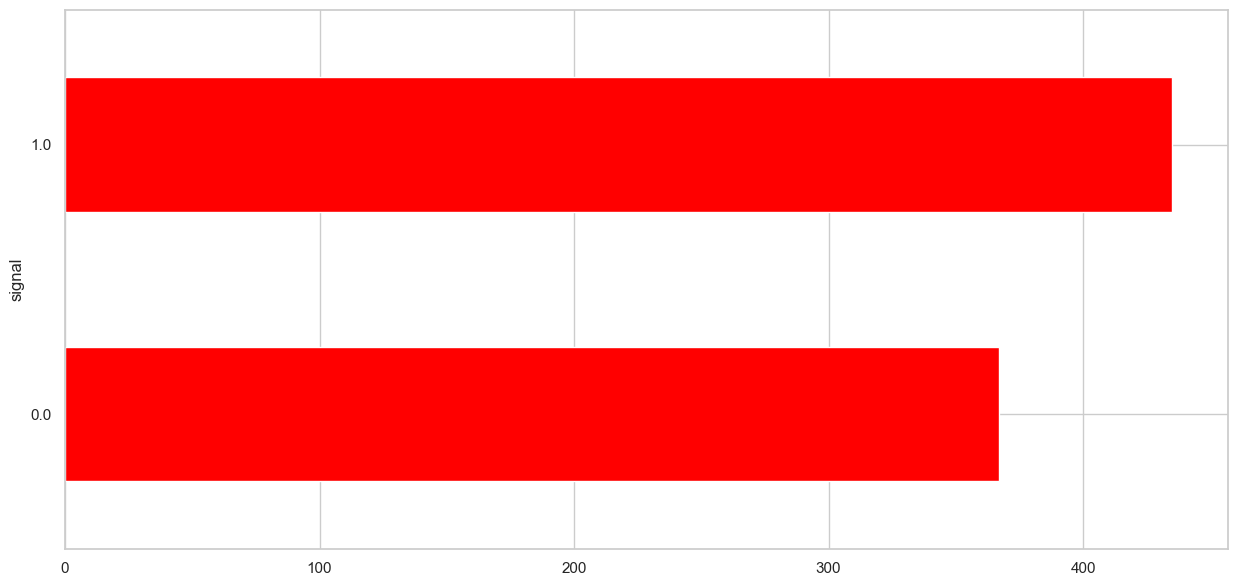

In [329]:
fig = plt.figure()
plot = df.groupby(['signal']).size().plot(kind='barh', color='red')
plt.show()

In [365]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
subset_dataset= df1.iloc[-10000:]
Y= subset_dataset["signal"]
X = subset_dataset.loc[:, df1.columns != 'signal']
validation_size = 0.2
seed = 1
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=1)

In [360]:
df1.drop(['conversionSymbol', 'time'], axis=1,inplace=True)

In [368]:
scaler = StandardScaler().fit(X_train)
rescaledDataset = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns, index = X_train.index)
# summarize transformed data
X_train.dropna(how='any', inplace=True)
rescaledDataset.dropna(how='any', inplace=True)
rescaledDataset.head(2)

high       low      open  volumefrom  volumeto     close  month  day  \
508  1.170298  1.150244  1.256673   -0.448203 -0.164317  1.083278    0.0  0.0   
632  0.723865  0.692645  0.812372   -0.611651 -0.591151  0.663912    0.0  0.0   

     day_of_week  short_mavg  ...     MOM30     RSI10     RSI30      %K10  \
508          0.0    1.181062  ...  0.150548 -0.099419  0.049200 -1.000923   
632          0.0    0.741103  ... -0.745865 -0.219085 -0.744776 -0.103469   

         %D10      %K30      %D30      MA21      MA63     MA252  
508  0.069583  0.232381  0.598239  1.181062  1.032390  0.583728  
632  0.713508  0.232488  0.673451  0.741103  0.629764  1.500281  

[2 rows x 27 columns]

Variance preserved by first 5 components == 94.87%


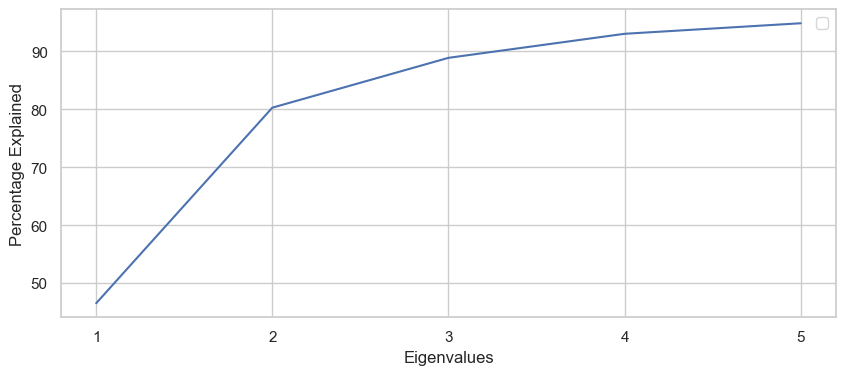

In [370]:
from sklearn.decomposition import TruncatedSVD
from matplotlib.ticker import MaxNLocator
ncomps = 5
svd = TruncatedSVD(n_components=ncomps)
svd_fit = svd.fit(rescaledDataset)
plt_data = pd.DataFrame(svd_fit.explained_variance_ratio_.cumsum()*100)
plt_data.index = np.arange(1, len(plt_data) + 1)
Y_pred = svd.fit_transform(rescaledDataset)
ax = plt_data.plot(kind='line', figsize=(10, 4))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel("Eigenvalues")
ax.set_ylabel("Percentage Explained")
ax.legend("")
print('Variance preserved by first 5 components == {:.2%}'.format(svd_fit.explained_variance_ratio_.cumsum()[-1]))

In [371]:
dfsvd = pd.DataFrame(Y_pred, columns=['c{}'.format(c) for c in range(ncomps)], index=rescaledDataset.index)
print(dfsvd.shape)
dfsvd.head()

(641, 5)


c0        c1        c2        c3        c4
508 -3.543527  1.226858 -0.049663 -0.438506 -0.149434
632 -2.959253  0.369513 -1.631474  0.533215  0.749239
793  2.964802  1.908463 -2.049786  0.403138  1.296680
307  1.813658 -2.070687  1.398699 -1.016191 -0.797307
998  1.354942 -3.104012  0.502167 -1.425596 -0.588038

In [372]:
svdcols = [c for c in dfsvd.columns if c[0] == 'c']

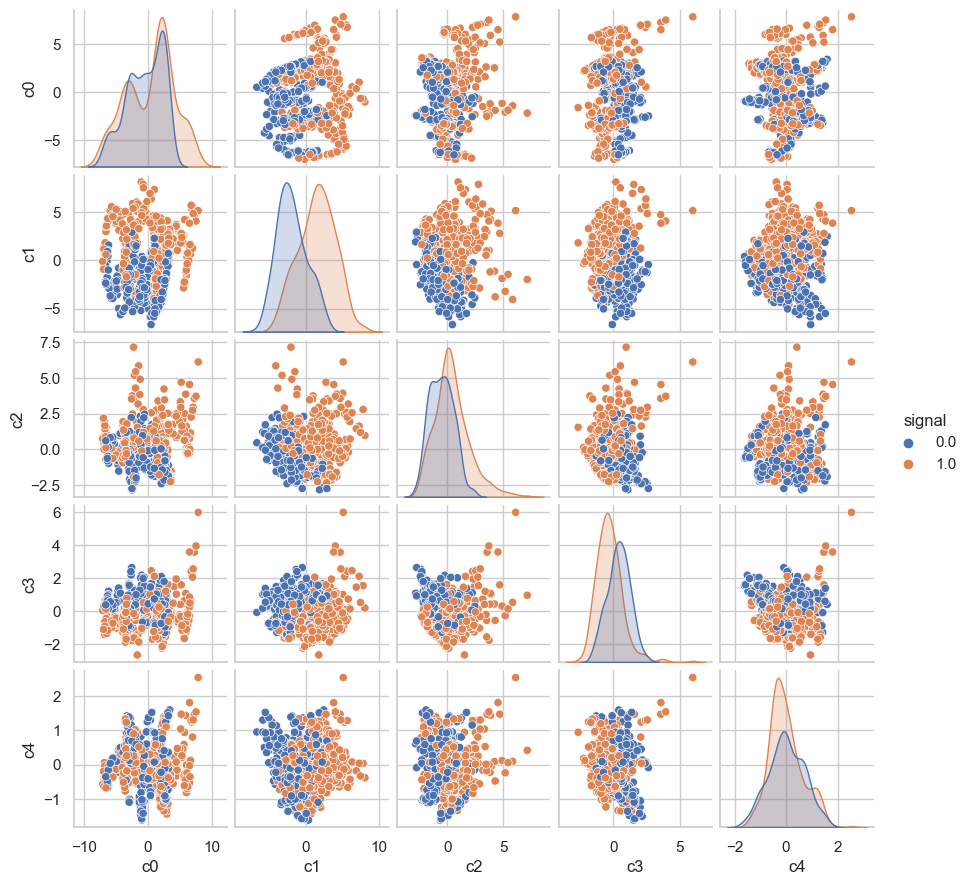

In [373]:
plotdims = 5
ploteorows = 1
dfsvdplot = dfsvd[svdcols].iloc[:,:plotdims]
dfsvdplot['signal']=Y_train
ax = sns.pairplot(dfsvdplot.iloc[::ploteorows,:], hue='signal', size=1.8)

In [401]:
df.head()

time    high     low  \
time                                                                          
1970-01-01 00:00:01.607126400 1970-01-01 00:00:01.607126400  771.55  746.67   
1970-01-01 00:00:01.607212800 1970-01-01 00:00:01.607212800  783.17  768.50   
1970-01-01 00:00:01.607299200 1970-01-01 00:00:01.607299200  773.51  754.30   
1970-01-01 00:00:01.607385600 1970-01-01 00:00:01.607385600  737.62  707.85   
1970-01-01 00:00:01.607472000 1970-01-01 00:00:01.607472000  753.40  717.98   

                                 open  volumefrom      volumeto   close  \
time                                                                      
1970-01-01 00:00:01.607126400  730.16   750251.20  5.759027e+08  767.61   
1970-01-01 00:00:01.607212800  767.61   659997.39  5.099993e+08  772.73   
1970-01-01 00:00:01.607299200  772.73   645874.83  4.903642e+08  759.22   
1970-01-01 00:00:01.607385600  759.22   944589.73  6.759917e+08  715.65   
1970-01-01 00:00:01.607472000  715.65   969750.70  7.176089e+08  739.99   

                              conversionType conversionSymbol  month  ...  \
time                                                                  ...   
1970-01-01 00:00:01.607126400       multiply              BTC      1  ...   
1970-01-01 00:00:01.607212800       multiply              BTC      1  ...   
1970-01-01 00:00:01.607299200       multiply              BTC      1  ...   
1970-01-01 00:00:01.607385600       multiply              BTC      1  ...   
1970-01-01 00:00:01.607472000       multiply              BTC      1  ...   

                               volumefrom_std_lag7  volumefrom_std_lag30  \
time                                                                       
1970-01-01 00:00:01.607126400        113398.003291         146474.711898   
1970-01-01 00:00:01.607212800        113398.003291         146474.711898   
1970-01-01 00:00:01.607299200         63819.081079          63819.081079   
1970-01-01 00:00:01.607385600         56626.883390          56626.883390   
1970-01-01 00:00:01.607472000        137607.678821         137607.678821   

                               volumeto_mean_lag3  volumeto_mean_lag7  \
time                                                                    
1970-01-01 00:00:01.607126400        8.845314e+08        8.854320e+08   
1970-01-01 00:00:01.607212800        5.759027e+08        5.759027e+08   
1970-01-01 00:00:01.607299200        5.429510e+08        5.429510e+08   
1970-01-01 00:00:01.607385600        5.254221e+08        5.254221e+08   
1970-01-01 00:00:01.607472000        5.587851e+08        5.630645e+08   

                               volumeto_mean_lag30  volumeto_std_lag3  \
time                                                                    
1970-01-01 00:00:01.607126400         8.897431e+08       2.126269e+08   
1970-01-01 00:00:01.607212800         5.759027e+08       2.126269e+08   
1970-01-01 00:00:01.607299200         5.429510e+08       4.660075e+07   
1970-01-01 00:00:01.607385600         5.254221e+08       4.480632e+07   
1970-01-01 00:00:01.607472000         5.630645e+08       1.019776e+08   

                               volumeto_std_lag7  volumeto_std_lag30    Gap  \
time                                                                          
1970-01-01 00:00:01.607126400       2.671459e+08        3.450735e+08  24.88   
1970-01-01 00:00:01.607212800       2.671459e+08        3.450735e+08  14.67   
1970-01-01 00:00:01.607299200       4.660075e+07        4.660075e+07  19.21   
1970-01-01 00:00:01.607385600       4.480632e+07        4.480632e+07  29.77   
1970-01-01 00:00:01.607472000       8.370306e+07        8.370306e+07  35.42   

                               open/close  
time                                       
1970-01-01 00:00:01.607126400    0.951212  
1970-01-01 00:00:01.607212800    0.993374  
1970-01-01 00:00:01.607299200    1.017795  
1970-01-01 00:00:01.607385600    1.060882  
1970-01-01 00:00:01.607472000    0.967108  

[5 rows x 70 co

In [402]:
df.to_csv('file1.csv')

In [414]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 802 entries, 1970-01-01 00:00:01.607126400 to 1970-01-01 00:00:01.676332800
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   time                   802 non-null    datetime64[ns]
 1   high                   802 non-null    float64       
 2   low                    802 non-null    float64       
 3   open                   802 non-null    float64       
 4   volumefrom             802 non-null    float64       
 5   volumeto               802 non-null    float64       
 6   close                  802 non-null    float64       
 7   conversionType         802 non-null    object        
 8   conversionSymbol       802 non-null    object        
 9   month                  802 non-null    int64         
 10  week                   802 non-null    int64         
 11  day                    802 non-null    int64         
 12  day_of_

# Feature importance


In [416]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

In [418]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=150)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 199 to 1000
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   high         802 non-null    float64
 1   low          802 non-null    float64
 2   open         802 non-null    float64
 3   volumefrom   802 non-null    float64
 4   volumeto     802 non-null    float64
 5   close        802 non-null    float64
 6   month        802 non-null    int64  
 7   day          802 non-null    int64  
 8   day_of_week  802 non-null    int64  
 9   short_mavg   802 non-null    float64
 10  long_mavg    802 non-null    float64
 11  signal       802 non-null    float64
 12  EMA10        802 non-null    float64
 13  EMA30        802 non-null    float64
 14  EMA200       802 non-null    float64
 15  ROC10        802 non-null    float64
 16  ROC30        802 non-null    float64
 17  MOM10        802 non-null    float64
 18  MOM30        802 non-null    float64
 19  RSI10

In [431]:
sort = rf.feature_importances_.argsort()

In [432]:
sort

array([ 6,  7,  8,  0,  5,  2,  1, 24, 11,  9, 12, 25, 23, 13, 26, 22, 21,
       16,  3, 10, 14, 15,  4, 18, 20, 17, 19])